 # P6 : Analysez les ventes d'une librairie avec Python

##  Mission 0 : Préparer les données

In [1]:
#Importer librairies numpy et pandas 
import numpy as np
import pandas as pd

In [2]:
#Importer les fichiers
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

### Customers

In [3]:
customers.shape

(8623, 3)

In [4]:
customers.head()  

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
customers.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

In [7]:
customers.describe()

birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000

fichier clients par ID, aucun doublon, aucune valeurs manquante, les catégories semblent ok, 8623 clients différents, 2 genres et 76 années de naissances différentes entre 1929 et 2004. 


### Products

In [8]:
products.shape

(3287, 3)

In [9]:
products.head(10)

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0
5  0_1163   9.99      0
6   1_463  36.99      1
7  0_2157  34.99      0
8  0_1915  16.99      0
9   0_389  18.99      0

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

In [12]:
products.describe()

price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000

In [13]:
products.groupby(by= 'categ').describe()

price                                                              
        count        mean        std    min     25%     50%     75%     max
categ                                                                      
0      2309.0   11.727280   7.568756  -1.00   5.580   10.32   16.65   40.99
1       739.0   25.531421  15.425162   2.00  13.390   22.99   33.99   80.99
2       239.0  108.354686  49.561431  30.99  71.065  101.99  136.53  300.00

Fichier produits : fichier produit par id, aucun doublon de produits, pas de valeurs manquante, les catégories semblent ok, 3287 produits différents, 1455 prix différents dans 3 catégorie (0,1 et 2) . 
Prix moyen 21.86, prix max 300 et prix min -1 ce qui semble étrange.

In [14]:
products.loc[products['price']<= 0]

id_prod  price  categ
731     T_0   -1.0      0

des livres qui coutent moins de 1e ca existe surtout des ebooks dans une boutique en ligne. (il y en a des gratuits sur amazon par exemple)
Mais des livres -1 ca ressemble à une anomalie. 

In [15]:
#supprimer la reference dont le prix est -1
products.drop(products.loc[products['price']== -1].index, inplace=True)

In [16]:
products.shape

(3286, 3)

Il manque bien 1 ligne

In [17]:
products.loc[products['id_prod']== 'T_0']

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

Le produit T_0 a été supprimé

### Transactions

In [18]:
transactions.shape

(679532, 4)

In [19]:
transactions.head()

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

In [20]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [21]:
transactions.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

nous avons les 679532 transactions des 8602 clients concernant 3267 produits au cours des 342316 sessions avec les dates. les dates sont en objet, ce qui n'est pas souhaitable. 

In [22]:
transactions['date'] = pd.to_datetime(transactions['date'])

ParserError: Unknown string format: test_2021-03-01 02:30:02.237419

Nous avons des dates "test_2021-03-01" qui empèchent la conversion

In [23]:
transactions.loc[transactions['id_prod']== 'T_0']

id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]

Nous avons encore la reference T_0 déjà supprimée dans product, ici nous en avons 200, je pense qu'il s'agit de tests inutiles et genants, je choisi de les supprimer

In [24]:
transactions.drop(transactions.loc[transactions['id_prod']== 'T_0'].index, inplace=True)

In [25]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [26]:
transactions.loc[transactions['id_prod']== 'T_0']

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []

Nous avons bien 200 lignes en moins et la reference a bien été supprimée 

Revenons à notre conversion en format date 

In [27]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [28]:
#je modifie le format date pour ne garder que l'année, les mois et les jours
transactions["date"] = transactions['date'].dt.strftime('%Y-%m-%d')

In [29]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [30]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


format date ok
transaction ne fait plus 679332 lignes avec aucune valeurs null

In [31]:
transactions.nunique()

id_prod         3266
date             730
session_id    342315
client_id       8600
dtype: int64

Nos 3 fichiers sont préparés nous pouvons les joindre pour obtenir un dataframe sur lequel travailler

###  Jointure

Dans notre configuration, transactions est notre fichier principal, sur lequel on va greffer les données clients (customers) et produits (products). Nous precedons en 2 temps. 

In [32]:
jointure1 = pd.merge(transactions, customers, on = 'client_id',how="left")
jointure1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 36.3+ MB


2em jointure

In [33]:
df = pd.merge(jointure1, products, on = 'id_prod',indicator=True, how="left")
df._merge.value_counts()

both          679111
left_only        221
right_only         0
Name: _merge, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  float64       
 8   _merge      679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 47.3+ MB


### Preparer notre DF

Dans notre dataframe nous avons 221 references sans prix et catégories. identifions les. 

In [35]:
sansprix = df.loc[df["price"].isna()]
sansprix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 2633 to 677797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     221 non-null    object        
 1   date        221 non-null    datetime64[ns]
 2   session_id  221 non-null    object        
 3   client_id   221 non-null    object        
 4   sex         221 non-null    object        
 5   birth       221 non-null    int64         
 6   price       0 non-null      float64       
 7   categ       0 non-null      float64       
 8   _merge      221 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.9+ KB


In [36]:
sansprix.head()

id_prod       date session_id client_id sex  birth  price  categ  \
2633   0_2245 2022-09-23   s_272266    c_4746   m   1940    NaN    NaN   
10103  0_2245 2022-07-23   s_242482    c_6713   f   1963    NaN    NaN   
11723  0_2245 2022-12-03   s_306338    c_5108   m   1978    NaN    NaN   
15670  0_2245 2021-08-16    s_76493    c_1391   m   1991    NaN    NaN   
16372  0_2245 2022-07-16   s_239078    c_7954   m   1973    NaN    NaN   

          _merge  
2633   left_only  
10103  left_only  
11723  left_only  
15670  left_only  
16372  left_only

In [37]:
sansprix['id_prod'].unique()

array(['0_2245'], dtype=object)

il s'agit du produit 0_2245

In [38]:
products['categ'].unique()

array([0, 1, 2], dtype=int64)

Nous avons 3 catégories de produits différents : 1, 2 et 3 

Identifions à quelle catégorie de produits il appartient. le premier chiffre d'"id_prod" semble correspondre à la catégorie de produit. verifions celà. 

In [39]:
products['firstnumberid'] = products['id_prod'].str.slice(start=0, stop=1)

In [40]:
products.head()

id_prod  price  categ firstnumberid
0  0_1421  19.99      0             0
1  0_1368   5.13      0             0
2   0_731  17.99      0             0
3   1_587   4.99      1             1
4  0_1507   3.99      0             0

In [41]:
pd.crosstab(products['categ'], products['firstnumberid'], dropna=False)

firstnumberid     0    1    2
categ                        
0              2308    0    0
1                 0  739    0
2                 0    0  239

les deux colonnes correspondent parfaitement et le total fait bien 3287, le premier chiffre id_prod correspond bien à celui de la catégorie.  
le produit 0_2245 est donc de catégorie 0 nous pouvons donc implementer cette data

In [42]:
df['categ'] = df['categ'].fillna(0)

Nous pouvons aussi estimer la valeurs de price pour ces produits en prenant la moyenne des prix de produits de la même catégorie

In [43]:
#round ici sert à arrondir
moy_sp = round(df['price'].loc[df['categ']==0].mean(),1)
print(moy_sp)

10.6


Nous pouvons implementer cette valeurs de 'price' pour ces produits dans notre dataframe

In [44]:
df['price'].fillna(value= moy_sp, inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   price       679332 non-null  float64       
 7   categ       679332 non-null  float64       
 8   _merge      679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 47.3+ MB


In [45]:
df.loc[df['id_prod']== '0_2245']

id_prod       date session_id client_id sex  birth  price  categ  \
2633    0_2245 2022-09-23   s_272266    c_4746   m   1940   10.6    0.0   
10103   0_2245 2022-07-23   s_242482    c_6713   f   1963   10.6    0.0   
11723   0_2245 2022-12-03   s_306338    c_5108   m   1978   10.6    0.0   
15670   0_2245 2021-08-16    s_76493    c_1391   m   1991   10.6    0.0   
16372   0_2245 2022-07-16   s_239078    c_7954   m   1973   10.6    0.0   
...        ...        ...        ...       ...  ..    ...    ...    ...   
669533  0_2245 2021-08-25    s_80395     c_131   m   1981   10.6    0.0   
670484  0_2245 2022-03-06   s_175311    c_4167   f   1979   10.6    0.0   
671088  0_2245 2022-05-16   s_209381    c_4453   m   1981   10.6    0.0   
675480  0_2245 2022-02-11   s_163405    c_1098   m   1986   10.6    0.0   
677797  0_2245 2021-12-14   s_134446    c_4854   m   1968   10.6    0.0   

           _merge  
2633    left_only  
10103   left_only  
11723   left_only  
15670   left_only  
16372   left_only  
...           ...  
669533  left_only  
670484  left_only  
671088  left_only  
675480  left_only  
677797  left_only  

[221 rows x 9 columns]

0_2245 a desormais un prix de 10.6 et associé à la catégorie 0. nous n'avons plus de nan dans notre DF

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   price       679332 non-null  float64       
 7   categ       679332 non-null  float64       
 8   _merge      679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 47.3+ MB


Bien qu'étant chiffrées nos catégories sont des variables qualitatives et non quantitatives nous pouvons les convertir en objet (string)

In [47]:
df = df.astype({"categ": str})


Nous pouvons y ajouter des colonnes pour nos analyses

In [48]:
df = df.assign(date2 = df['date'].dt.strftime('%Y-%m'))
df = df.assign(années = df['date'].dt.strftime('%Y'))
df = df.assign(mois = df['date'].dt.strftime('%m'))
df = df.assign(jours = df['date'].dt.strftime('%d')) 
df = df.assign(age= 2023 - df["birth"]) 
df = df.assign(vente= 1) 


In [49]:
df.head()


id_prod       date session_id client_id sex  birth  price categ _merge  \
0  0_1518 2022-05-20   s_211425     c_103   f   1986   4.18   0.0   both   
1   1_251 2022-02-02   s_158752    c_8534   m   1988  15.99   1.0   both   
2  0_1277 2022-06-18   s_225667    c_6714   f   1968   7.99   0.0   both   
3   2_209 2021-06-24    s_52962    c_6941   m   2000  69.99   2.0   both   
4  0_1509 2023-01-11   s_325227    c_4232   m   1980   4.99   0.0   both   

     date2 années mois jours  age  vente  
0  2022-05   2022   05    20   37      1  
1  2022-02   2022   02    02   35      1  
2  2022-06   2022   06    18   55      1  
3  2021-06   2021   06    24   23      1  
4  2023-01   2023   01    11   43      1

In [50]:
#créer des catégories d'age
bins= [0,25,45,65,100]
labels = ['-26','26-45','46-65','+65']
df['groupe_age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [51]:
df.head()

id_prod       date session_id client_id sex  birth  price categ _merge  \
0  0_1518 2022-05-20   s_211425     c_103   f   1986   4.18   0.0   both   
1   1_251 2022-02-02   s_158752    c_8534   m   1988  15.99   1.0   both   
2  0_1277 2022-06-18   s_225667    c_6714   f   1968   7.99   0.0   both   
3   2_209 2021-06-24    s_52962    c_6941   m   2000  69.99   2.0   both   
4  0_1509 2023-01-11   s_325227    c_4232   m   1980   4.99   0.0   both   

     date2 années mois jours  age  vente groupe_age  
0  2022-05   2022   05    20   37      1      26-45  
1  2022-02   2022   02    02   35      1      26-45  
2  2022-06   2022   06    18   55      1      46-65  
3  2021-06   2021   06    24   23      1        -26  
4  2023-01   2023   01    11   43      1      26-45

##  Mission I :  Analyse des Indicateurs de vente 

### Le Chiffre d'affaires

#### calcul du chiffre d'affaires total sur la période

In [52]:
ca = round (df['price'].sum(),1)
print('le chiffre d affaires total sur la période est de',ca)

le chiffre d affaires total sur la période est de 11856071.3


#### Calcul du CA/années 

In [53]:
ca2021 = round (df['price'].loc[df['années']== 2021].sum(),1)
ca2022 = round (df['price'].loc[df['années']== 2022].sum(),1)
ca2023 = round (df['price'].loc[df['années']== 2023].sum(),1)
print('le CA pour 2021 est :',ca2021, 'celui de 2022 est :', ca2022, 'et celui de 2023 est :',ca2023 )

le CA pour 2021 est : 0.0 celui de 2022 est : 0.0 et celui de 2023 est : 0.0


a noter que seule l'année 2022 est complète

#### Evolution du CA dans le temps 

In [54]:
Table = pd.pivot_table(df, index ='date', values= "price", aggfunc= 'sum')
Table.head()

price
date                
2021-03-01  16575.82
2021-03-02  15497.05
2021-03-03  15198.69
2021-03-04  15196.07
2021-03-05  17471.37

In [55]:
Table.describe()

price
count    730.000000
mean   16241.193534
std     1848.106490
min     8076.040000
25%    15477.805000
50%    16227.890000
75%    17186.475000
max    20498.280000

On a un CA moyen par jour de 16241 par jour sur la période, le minimum est de 8076 et le max 20498

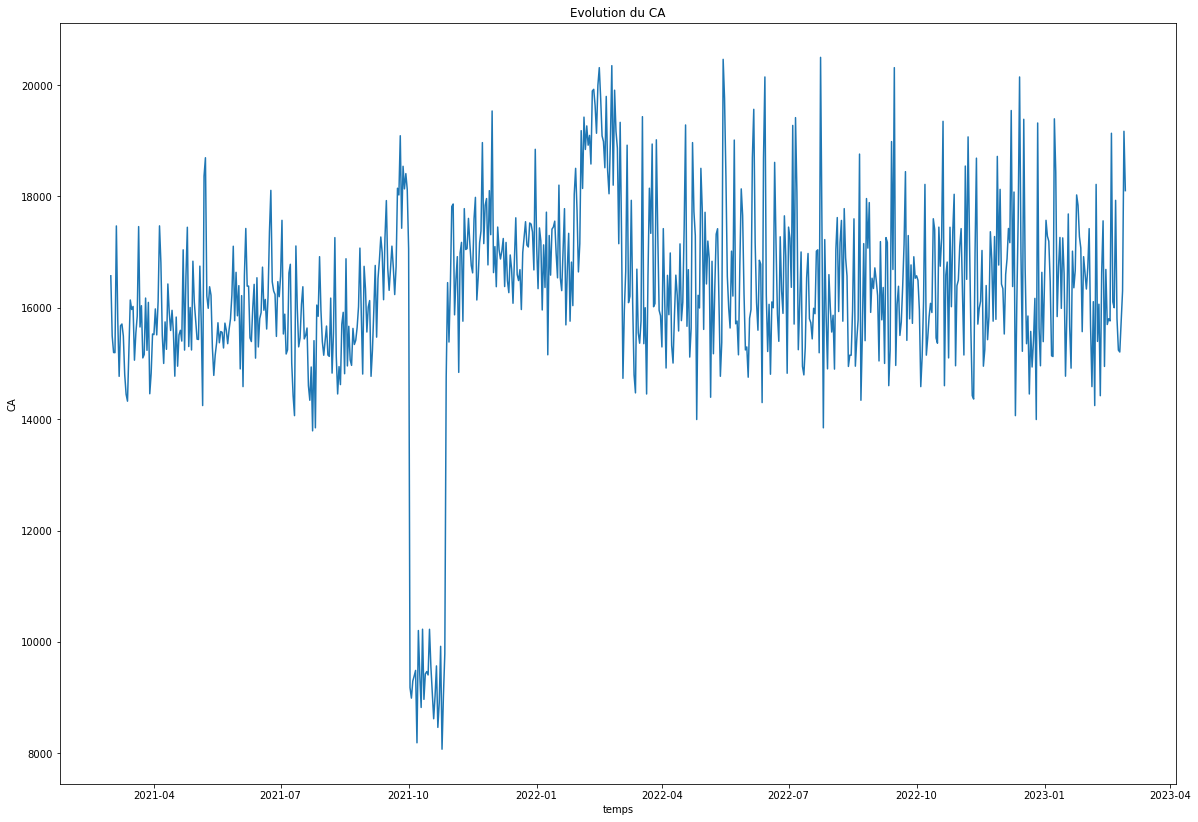

In [56]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
import seaborn as sns

plt.figure(figsize=(20, 14))

temps = Table.index
CA = Table["price"]
  
plt.plot(temps, CA)
plt.title('Evolution du CA')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

On remarque une baisse  "brutale" du CA entre octobre et novembre 2021

#### Analyse du mois d'Octobre 2021

In [57]:
filtered_table=Table.loc['2021-10-01':'2021-11-01']
filtered_table.head(30)

price
date                
2021-10-01  17058.34
2021-10-02   9182.13
2021-10-03   8993.05
2021-10-04   9300.88
2021-10-05   9390.46
2021-10-06   9490.69
2021-10-07   8191.08
2021-10-08  10207.35
2021-10-09   9425.36
2021-10-10   8825.65
2021-10-11  10230.56
2021-10-12   8971.15
2021-10-13   9427.22
2021-10-14   9469.78
2021-10-15   9409.43
2021-10-16  10229.02
2021-10-17   9557.98
2021-10-18   9083.72
2021-10-19   8622.91
2021-10-20   9031.79
2021-10-21   9571.79
2021-10-22   8467.86
2021-10-23   8910.64
2021-10-24   9923.19
2021-10-25   8076.04
2021-10-26   9031.39
2021-10-27   9789.53
2021-10-28  14758.42
2021-10-29  16453.63
2021-10-30  15386.78

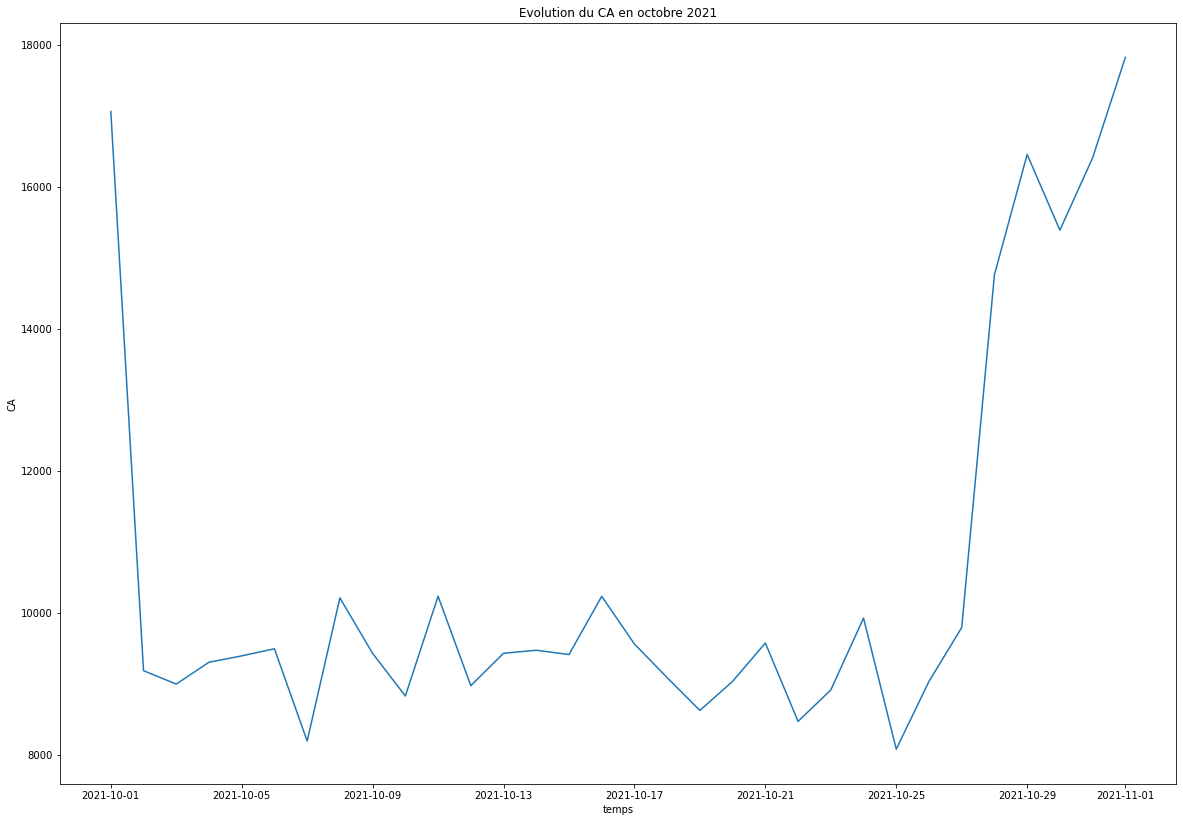

In [58]:
plt.figure(figsize=(20, 14))

temps = filtered_table.index
CA = filtered_table["price"]
  
plt.plot(temps, CA)
plt.title('Evolution du CA en octobre 2021')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

In [59]:
mask = (df['date'] > '2021-09-30') & (df['date'] < '2021-11-01')
dfoctobre=df.loc[mask]

Essayons de savoir quelle catégorie de produits celà concerne

In [60]:
Tablex = pd.pivot_table(dfoctobre, index ='date', columns = 'categ',fill_value = 0, values= "price", aggfunc= 'sum')
Tablex.head(31)

categ           0.0      1.0      2.0
date                                 
2021-10-01  6950.50  7003.79  3104.05
2021-10-02  7141.01     0.00  2041.12
2021-10-03  6786.57     0.00  2206.48
2021-10-04  6554.80     0.00  2746.08
2021-10-05  6357.91     0.00  3032.55
2021-10-06  7546.58     0.00  1944.11
2021-10-07  6404.01     0.00  1787.07
2021-10-08  7069.53     0.00  3137.82
2021-10-09  6808.69     0.00  2616.67
2021-10-10  6490.98     0.00  2334.67
2021-10-11  7005.40     0.00  3225.16
2021-10-12  6706.97     0.00  2264.18
2021-10-13  6760.40     0.00  2666.82
2021-10-14  6422.39     0.00  3047.39
2021-10-15  6707.68     0.00  2701.75
2021-10-16  6898.14     0.00  3330.88
2021-10-17  6492.60     0.00  3065.38
2021-10-18  6376.43     0.00  2707.29
2021-10-19  5806.91     0.00  2816.00
2021-10-20  5913.37     0.00  3118.42
2021-10-21  6438.85     0.00  3132.94
2021-10-22  6051.86     0.00  2416.00
2021-10-23  5704.26     0.00  3206.38
2021-10-24  6036.65     0.00  3886.54
2021-10-25  5817.82     0.00  2258.22
2021-10-26  6345.61     0.00  2685.78
2021-10-27  5822.24     0.00  3967.29
2021-10-28  5837.61  6317.99  2602.82
2021-10-29  6410.57  6425.18  3617.88
2021-10-30  5734.62  6753.69  2898.47
2021-10-31  5924.07  7261.67  3219.38

Du 2 au 27 octobre 2021 il y a aucune transactions concernant les produits de la catégorie 1.0

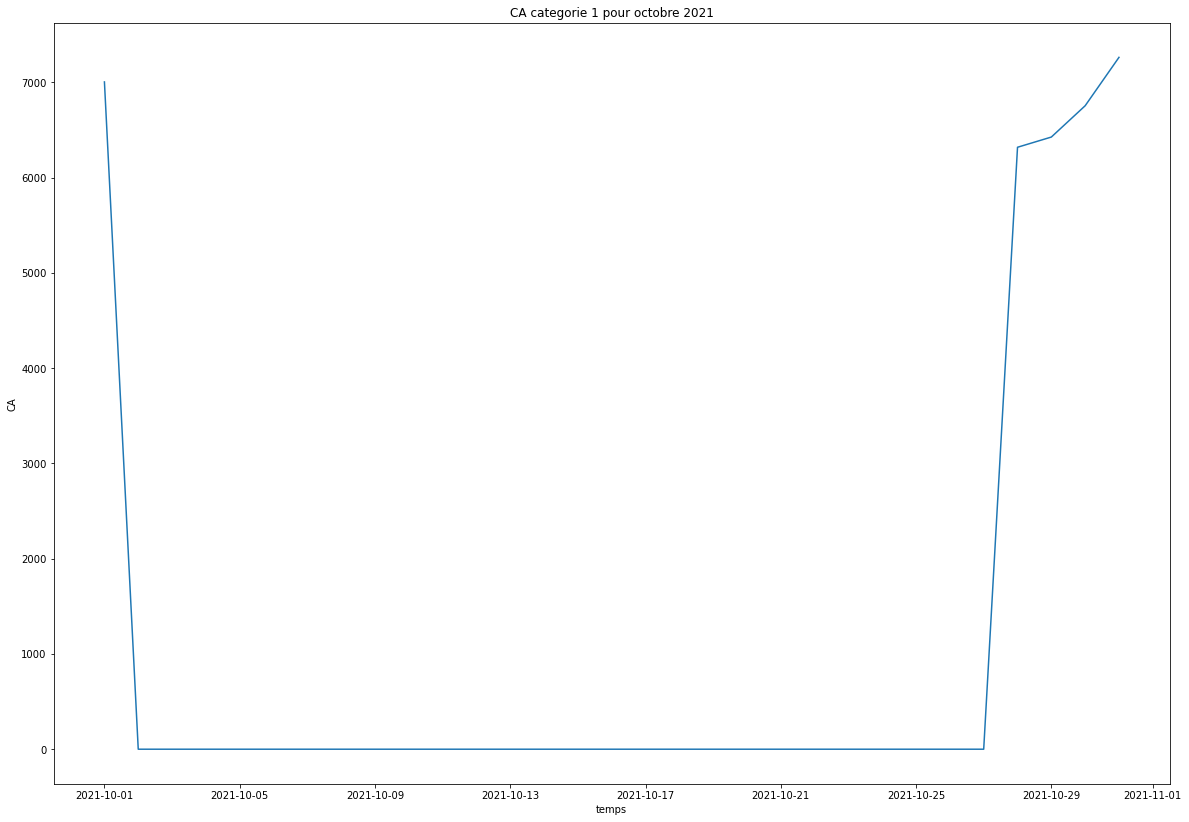

In [61]:
plt.figure(figsize=(20, 14))

temps = Tablex.index
CA = Tablex['1.0']
  
plt.plot(temps, CA)
plt.title('CA categorie 1 pour octobre 2021')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

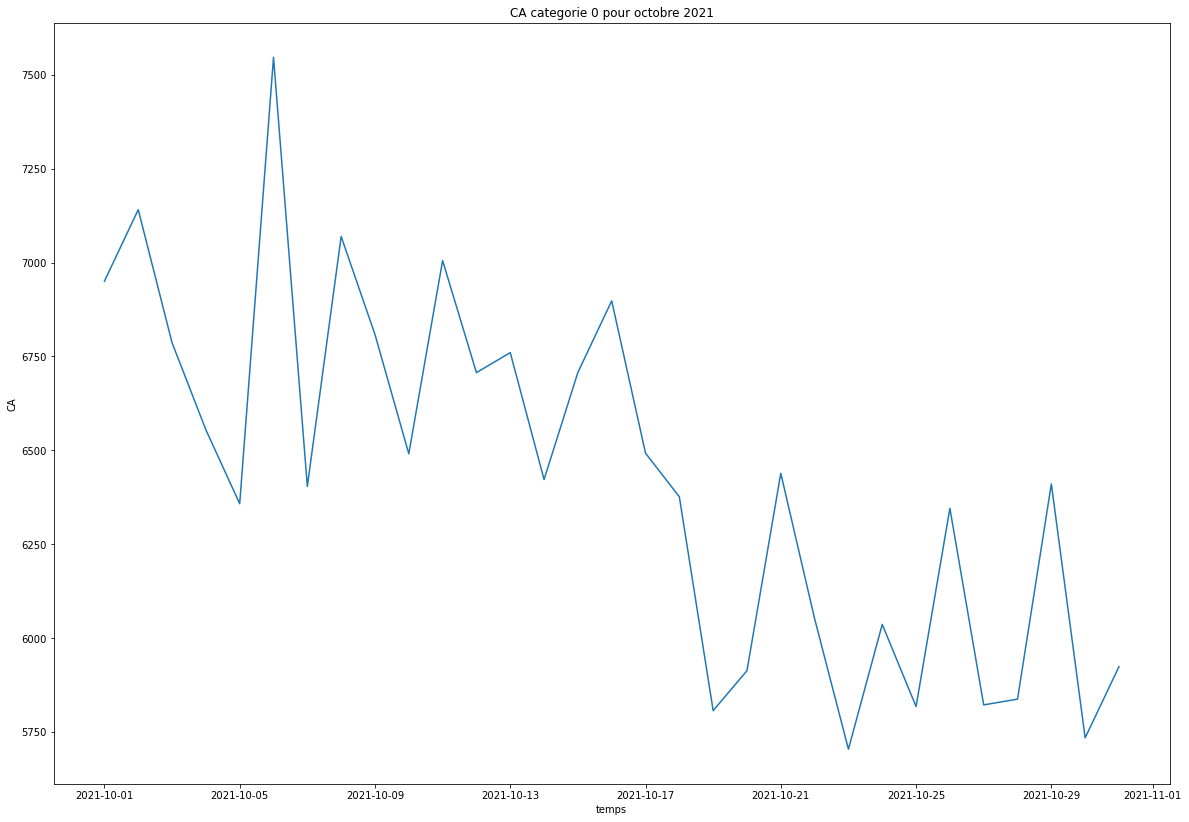

In [62]:
plt.figure(figsize=(20, 14))

temps = Tablex.index
CA = Tablex['0.0']
  
plt.plot(temps, CA)
plt.title('CA categorie 0 pour octobre 2021')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

tendance légèrement à la baisse du ca de la catégorie 0

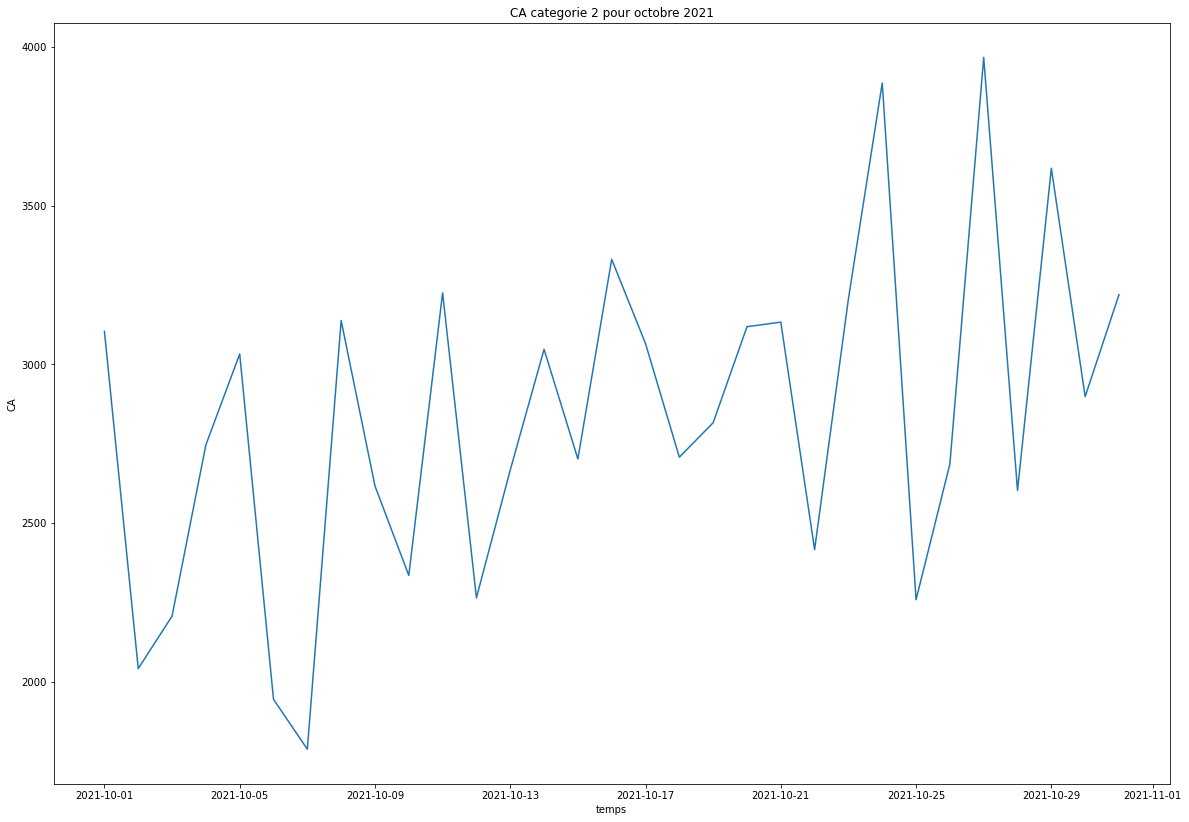

In [63]:
plt.figure(figsize=(20, 14))

temps = Tablex.index
CA = Tablex['2.0']
  
plt.plot(temps, CA)
plt.title('CA categorie 2 pour octobre 2021')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

Sur la période on observe une baisse des ventes globales. Elle est en grande partie du à l'absence de ventes de produits de la catégorie 1 (rupture de stocks? perte de données ?) qui engendre une baisse du CA

#### Evolution du CA par Catégorie

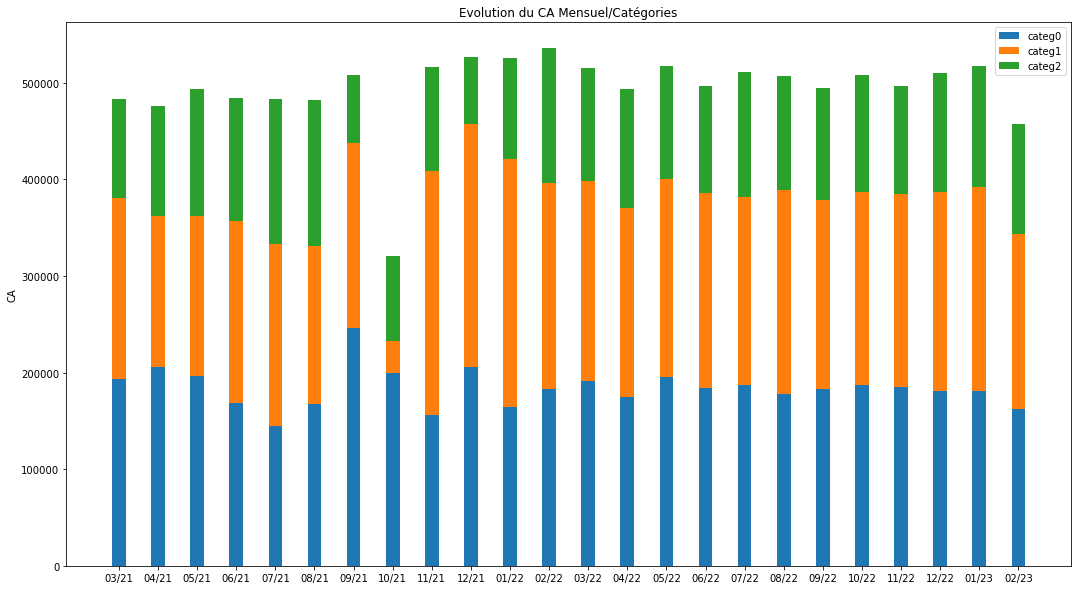

In [64]:
plt.figure(figsize=(18, 10))

categ0 = df.loc[df['categ'] == '0.0'].groupby('date2')['price'].sum()
categ1 = df.loc[df['categ'] == '1.0'].groupby('date2')['price'].sum()
categ2 = df.loc[df['categ'] == '2.0'].groupby('date2')['price'].sum()
ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



p1 = plt.bar(ind, categ0, width)
p2 = plt.bar(ind, categ1, width, bottom =categ0)
#p3 = plt.bar(ind, catsMeans, width, bottom= tuple(map(sum, zip(menMeans, womenMeans))))
p3 = plt.bar(ind, categ2, width, bottom= categ0+ categ1)


plt.ylabel('CA')
plt.title('Evolution du CA Mensuel/Catégories')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0],p3[0]), ('categ0', 'categ1','categ2'))

plt.show()


#### Calcul du CA par catégorie

calcul du CA pour la catégorie 0

In [65]:
ca_cat0 = round (df.loc[df['categ']=='0.0']['price'].sum(),1)
print (ca_cat0)

4422073.6


calcul du pourcentage du ca de la catégorie 0

In [66]:
pc_cat0 = ca_cat0/ca*100
print (pc_cat0)

37.29796732919445


calcul du CA pour la catégorie 1

In [67]:
ca_cat1 = round (df.loc[df['categ']=='1.0']['price'].sum(),1)
print (ca_cat1)

4653722.7


calcul du pourcentage du ca de la catégorie 1

In [41]:
pc_cat1 = ca_cat1/ca*100
print (pc_cat1)

39.25181101095436


calcul du CA pour la catégorie 2

In [68]:
ca_cat2 = round (df.loc[df['categ']=='2.0']['price'].sum(),1)
print (ca_cat2)

2780275.0


calcul du pourcentage du CA pour la catégorie 2

In [69]:
pc_cat2 = ca_cat2/ca*100
print (pc_cat2)

23.450221659851184


#### Répartition du CA par Catégorie

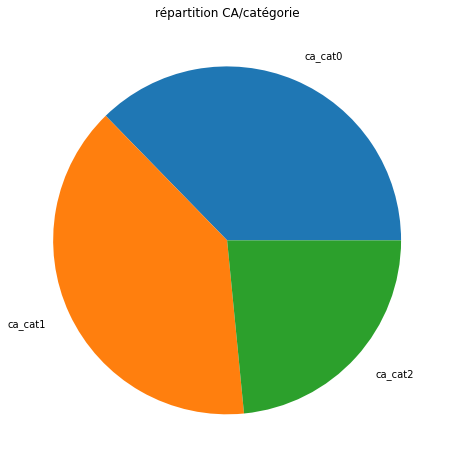

In [70]:
import matplotlib.pyplot as plt

# create random data
plt.figure(figsize = (10, 8))
names='ca_cat0', 'ca_cat1', 'ca_cat2',
size_of_groups=[ca_cat0, ca_cat1, ca_cat2]
 

# Label distance: gives the space between labels and the center of the pie
plt.title('répartition CA/catégorie')
plt.pie(size_of_groups, labels=names, labeldistance=1.15);
plt.show();

#### Répartition CA par clients

Utilisons une courbe de Lorenz pour représenter la répartition du ca par clients

In [71]:
ca_client = pd.pivot_table(df, index= "client_id", values= "price",  aggfunc= 'sum')
ca_client.nlargest(columns='price', n=10)

price
client_id           
c_1609     324033.35
c_4958     289760.34
c_6714     153662.52
c_3454     113669.73
c_3263       5276.87
c_1570       5271.62
c_2899       5214.05
c_2140       5208.82
c_7319       5155.77
c_8026       5093.18

On peut remarquer un gros gap entre les 4 meilleurs clients et le reste, ce sont peut etre des revendeurs

##### Courbe de Lorenz CA/Clients

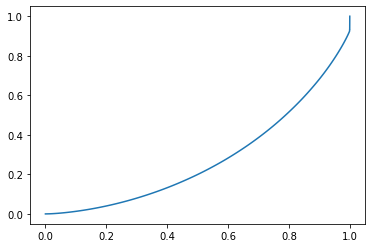

In [72]:
depenses = ca_client[ca_client['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.show()

L'indice de Gini résume la courbe de lorenz

##### Indice de Gini CA/Clients

In [73]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.4463954860088072

Indice de giny <0.5 donc inégalités de CA entre clients sont modérées 

Nous pouvons créer 2 dataframe, b to b et b to c 

##### Création d'un DF BTC

In [75]:
btc= df.copy()

In [76]:
btc.drop(btc.loc[btc['client_id']=='c_1609'].index, inplace=True)
btc.drop(btc.loc[btc['client_id']=='c_4958'].index, inplace=True)
btc.drop(btc.loc[btc['client_id']=='c_6714'].index, inplace=True)
btc.drop(btc.loc[btc['client_id']=='c_3454'].index, inplace=True)
btc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632689 entries, 0 to 679331
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     632689 non-null  object        
 1   date        632689 non-null  datetime64[ns]
 2   session_id  632689 non-null  object        
 3   client_id   632689 non-null  object        
 4   sex         632689 non-null  object        
 5   birth       632689 non-null  int64         
 6   price       632689 non-null  float64       
 7   categ       632689 non-null  object        
 8   _merge      632689 non-null  category      
 9   date2       632689 non-null  object        
 10  années      632689 non-null  object        
 11  mois        632689 non-null  object        
 12  jours       632689 non-null  object        
 13  age         632689 non-null  int64         
 14  vente       632689 non-null  int64         
 15  groupe_age  632689 non-null  category      
dtypes:

##### Répartition CA par clients BTC

In [77]:
ca_clientbtc = pd.pivot_table(btc, index= "client_id", values= "price",  aggfunc= 'sum')
ca_clientbtc.nlargest(columns='price', n=10)

price
client_id         
c_3263     5276.87
c_1570     5271.62
c_2899     5214.05
c_2140     5208.82
c_7319     5155.77
c_8026     5093.18
c_7959     5085.45
c_7421     5050.20
c_5263     5006.85
c_1422     4993.55

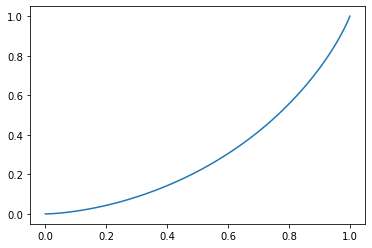

In [78]:
depenses = ca_clientbtc[ca_clientbtc['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [79]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.40263082391169847

Nous avons toujour des inégalités de CA par clients mais elles sont moins importantes que précedement

##### Création d'un DF BTB

In [80]:
DF = df.replace(["c_1609","c_4958", "c_6714", "c_3454", ],"BTB")

In [81]:
btb = DF.loc[DF['client_id']== 'BTB']
btb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46643 entries, 2 to 679314
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     46643 non-null  object        
 1   date        46643 non-null  datetime64[ns]
 2   session_id  46643 non-null  object        
 3   client_id   46643 non-null  object        
 4   sex         46643 non-null  object        
 5   birth       46643 non-null  int64         
 6   price       46643 non-null  float64       
 7   categ       46643 non-null  object        
 8   _merge      46643 non-null  category      
 9   date2       46643 non-null  object        
 10  années      46643 non-null  object        
 11  mois        46643 non-null  object        
 12  jours       46643 non-null  object        
 13  age         46643 non-null  int64         
 14  vente       46643 non-null  int64         
 15  groupe_age  46643 non-null  category      
dtypes: category(2), datet

###### Calcul du CA BTB et BTC

In [82]:
cabtc = btc['price'].sum()
print (cabtc)

10974945.34


In [83]:
cabtb = btb['price'].sum()
print(cabtb)

881125.94


In [84]:
round(cabtb/ca*100,1)

7.4

Le CA BTB représente 7.4% du CA total

#### Evolution du CA par genre 

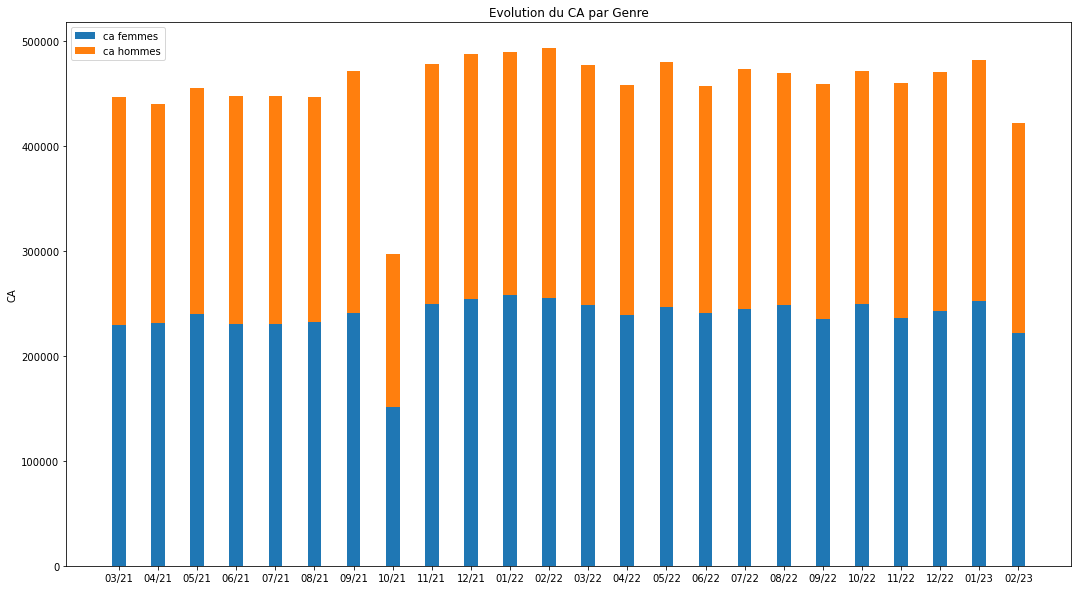

In [85]:
plt.figure(figsize=(18, 10))

cafemmes = btc.loc[btc['sex'] == 'f' ].groupby('date2')['price'].sum()
cahommes = btc.loc[btc['sex'] == 'm' ].groupby('date2')['price'].sum()

ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



p1 = plt.bar(ind, cafemmes, width)
p2 = plt.bar(ind, cahommes, width, bottom =cafemmes)


plt.ylabel('CA')
plt.title('Evolution du CA par Genre')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0]), ('ca femmes', 'ca hommes'))

plt.show()

#### Evolution du CA par tranche d'age

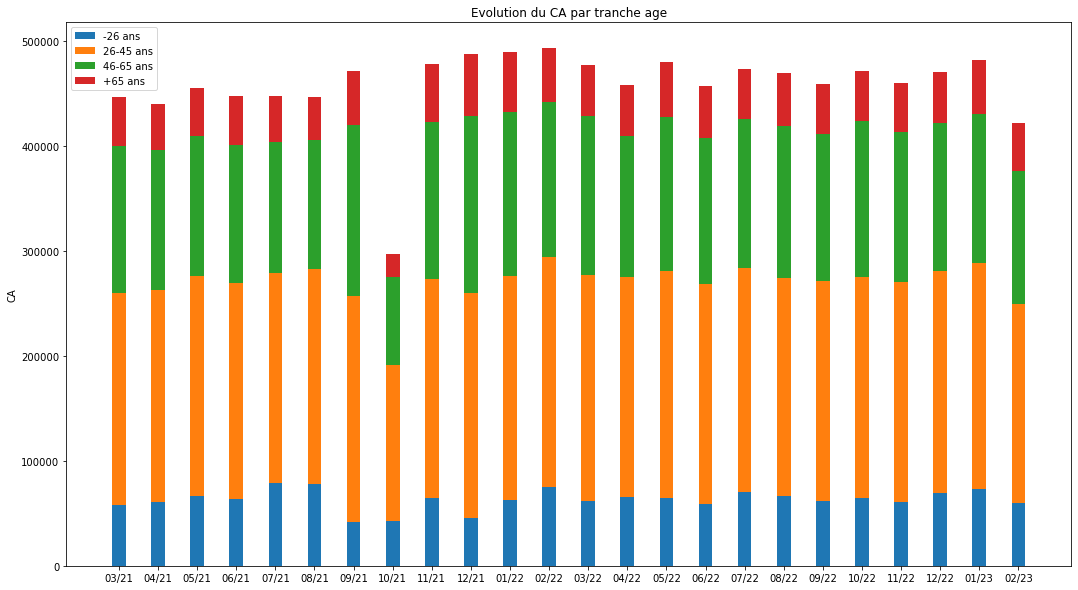

In [86]:
plt.figure(figsize=(18, 10))

moins26 = btc.loc[btc['groupe_age'] == '-26' ].groupby('date2')['price'].sum()
moins45 = btc.loc[btc['groupe_age'] == '26-45' ].groupby('date2')['price'].sum()
moins65 = btc.loc[btc['groupe_age'] == '46-65' ].groupby('date2')['price'].sum()
plus65 = btc.loc[btc['groupe_age']  == '+65' ].groupby('date2')['price'].sum()

ind = np.arange(24)    
width = 0.35      


p1 = plt.bar(ind, moins26, width)
p2 = plt.bar(ind, moins45, width, bottom =moins26)
p3 = plt.bar(ind, moins65, width, bottom= moins26+ moins45)
p4 = plt.bar(ind, plus65, width, bottom= moins26+ moins45 + moins65)

plt.ylabel('CA')
plt.title('Evolution du CA par tranche age')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0],p3[0], p4[0]), ('-26 ans', '26-45 ans','46-65 ans', '+65 ans'))

plt.show()

#### Evolution nb Clients par catégorie 

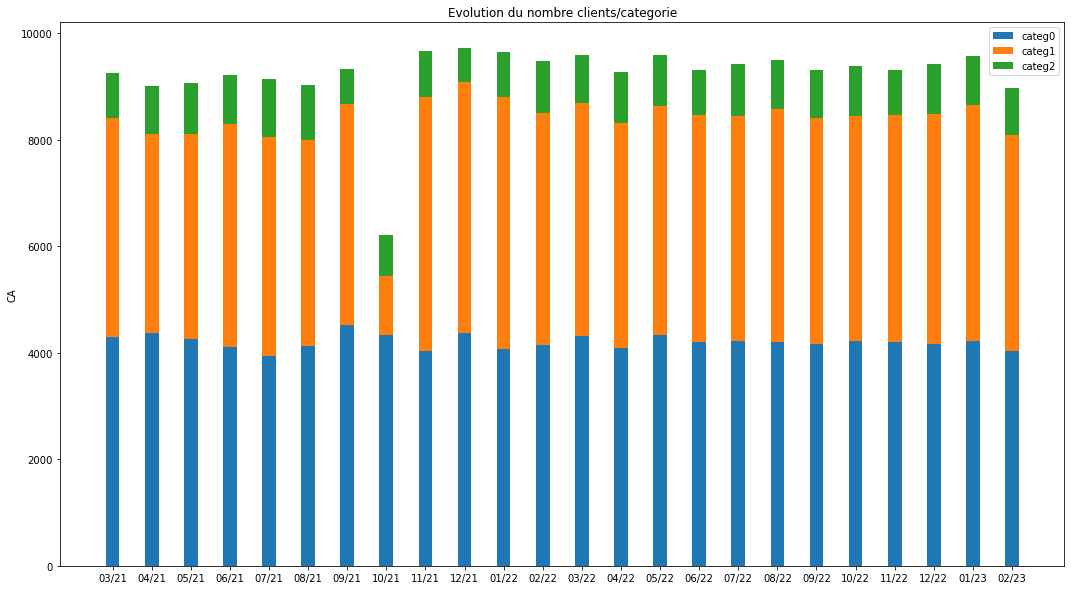

In [87]:
plt.figure(figsize=(18, 10))

categ0 = df.loc[df['categ'] == '0.0' ].groupby('date2')['client_id'].nunique()
categ1 = df.loc[df['categ'] == '1.0' ].groupby('date2')['client_id'].nunique()
categ2 = df.loc[df['categ'] == '2.0' ].groupby('date2')['client_id'].nunique()
ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



p1 = plt.bar(ind, categ0, width)
p2 = plt.bar(ind, categ1, width, bottom =categ0)
#p3 = plt.bar(ind, catsMeans, width, bottom= tuple(map(sum, zip(menMeans, womenMeans))))
p3 = plt.bar(ind, categ2, width, bottom= categ0+ categ1)


plt.ylabel('CA')
plt.title('Evolution du nombre clients/categorie')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0],p3[0]), ('categ0', 'categ1','categ2'))

plt.show()

#### Evolution du CA BTC

In [88]:
CABTC = pd.pivot_table(btc, index ='date', values= "price", aggfunc= 'sum')
CABTC.head()

price
date                
2021-03-01  15479.25
2021-03-02  14569.07
2021-03-03  13899.99
2021-03-04  13567.62
2021-03-05  16216.09

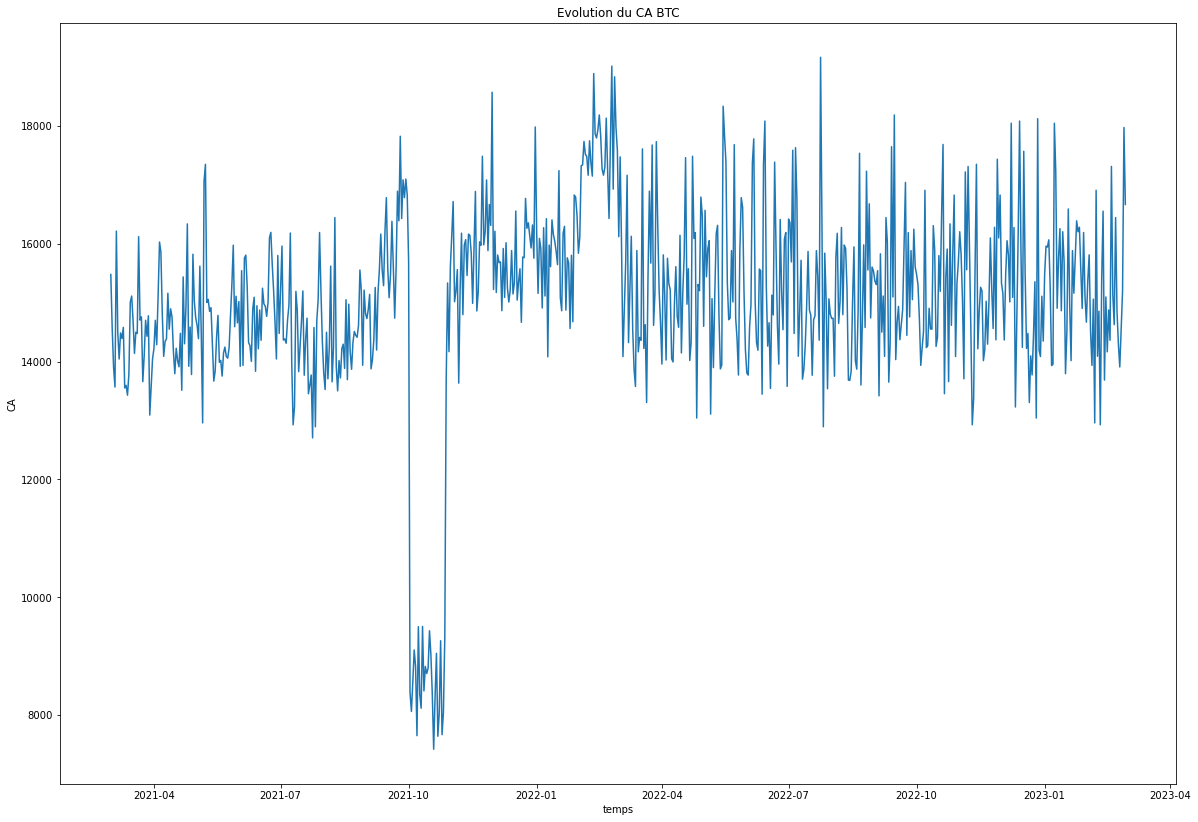

In [89]:
plt.figure(figsize=(20, 14))

temps = CABTC.index
CA = CABTC["price"]
  
plt.plot(temps, CA)
plt.title('Evolution du CA BTC')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

#### Evolution du CA BTB

In [90]:
CABTB = pd.pivot_table(btb, index ='date', values= "price", aggfunc= 'sum')
CABTB.head()

price
date               
2021-03-01  1096.57
2021-03-02   927.98
2021-03-03  1298.70
2021-03-04  1628.45
2021-03-05  1255.28

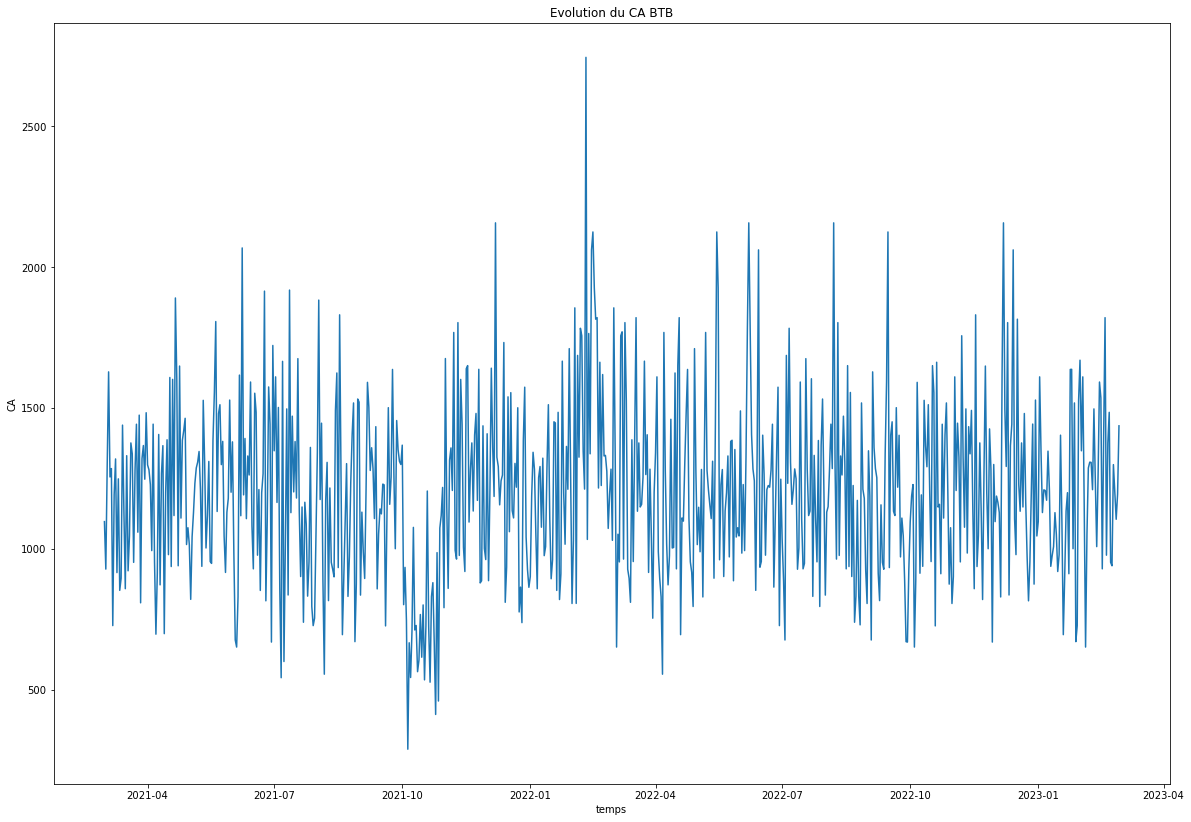

In [91]:
plt.figure(figsize=(20, 14))

temps = CABTB.index
CA = CABTB["price"]
  
plt.plot(temps, CA)
plt.title('Evolution du CA BTB')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

Le CA chute dans les 2 cas au mois d'octobre 2021 (car pas de données sur la categ 1)

### Les Ventes

#### Evolution des ventes

In [92]:
dfventes= pd.pivot_table(df, index ='date', values= "vente", aggfunc= 'sum')
dfventes.head()

vente
date             
2021-03-01    963
2021-03-02    940
2021-03-03    911
2021-03-04    903
2021-03-05    943

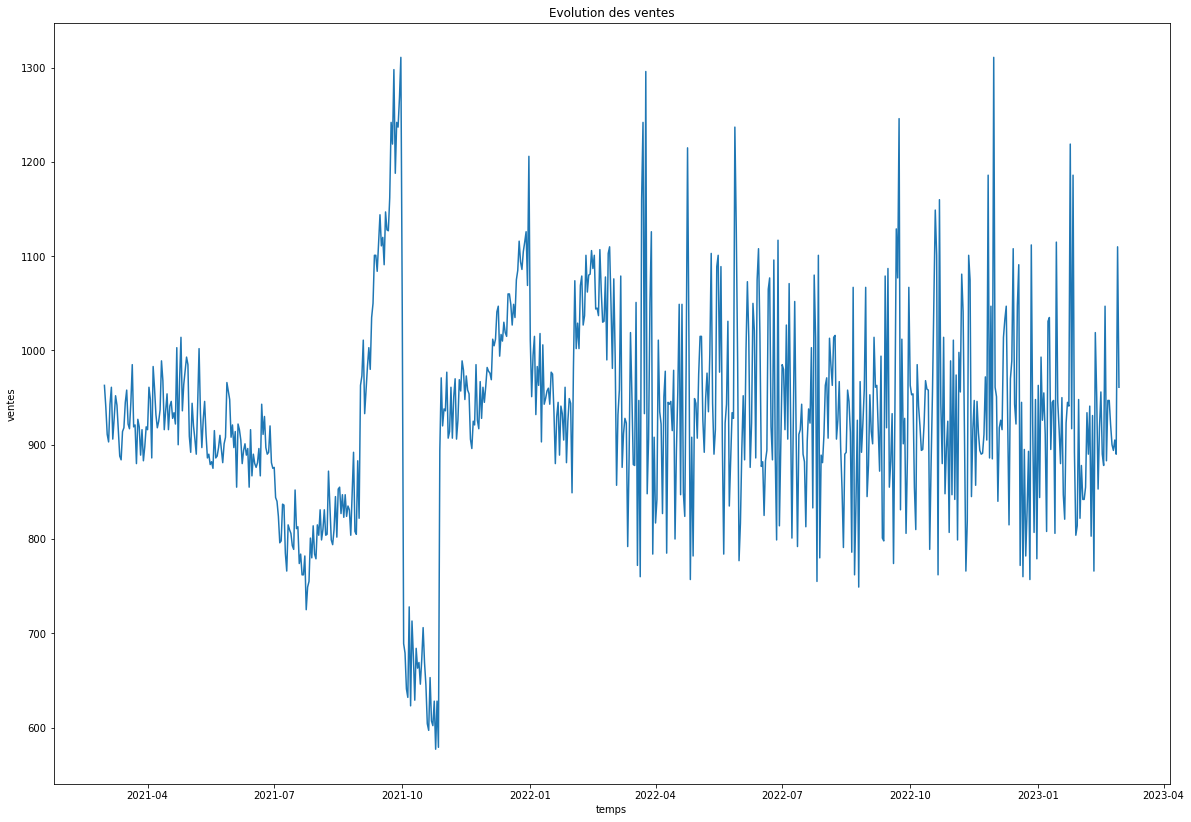

In [93]:
plt.figure(figsize=(20, 14))

temps = dfventes.index
ventes = dfventes["vente"]
  
plt.plot(temps, ventes)
plt.title('Evolution des ventes')
plt.xlabel('temps')
plt.ylabel('ventes')
plt.show()

#### Ventes par catégorie

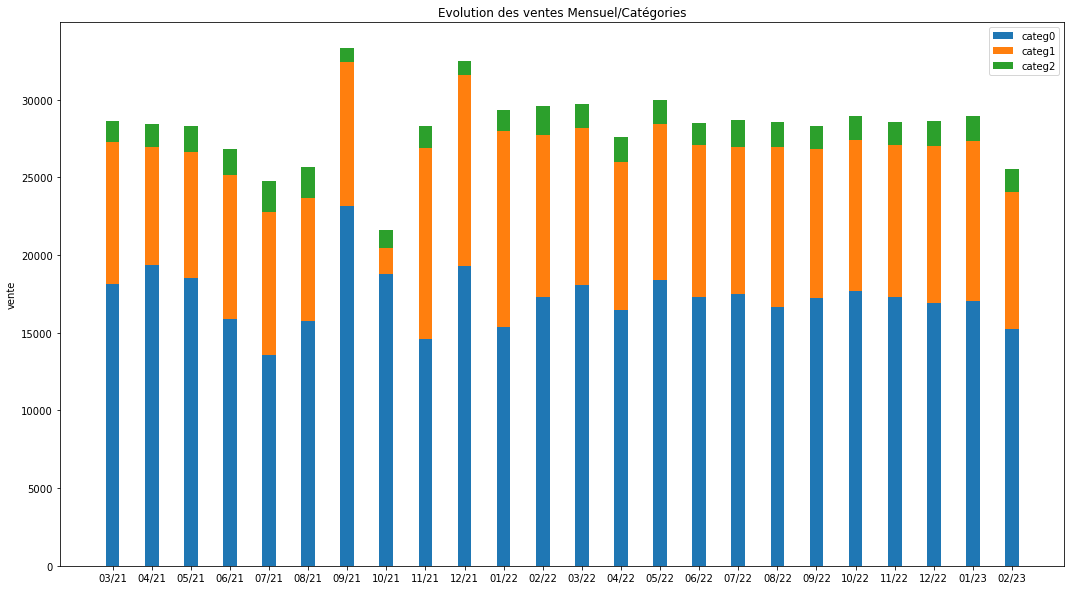

In [94]:
plt.figure(figsize=(18, 10))

categ0 = df.loc[df['categ'] == '0.0' ].groupby('date2')['vente'].sum()
categ1 = df.loc[df['categ'] == '1.0' ].groupby('date2')['vente'].sum()
categ2 = df.loc[df['categ'] == '2.0' ].groupby('date2')['vente'].sum()
ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



p1 = plt.bar(ind, categ0, width)
p2 = plt.bar(ind, categ1, width, bottom =categ0)
#p3 = plt.bar(ind, catsMeans, width, bottom= tuple(map(sum, zip(menMeans, womenMeans))))
p3 = plt.bar(ind, categ2, width, bottom= categ0+ categ1)


plt.ylabel('vente')
plt.title('Evolution des ventes Mensuel/Catégories')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0],p3[0]), ('categ0', 'categ1','categ2'))

plt.show()

#### Evolution Ventes par Genre

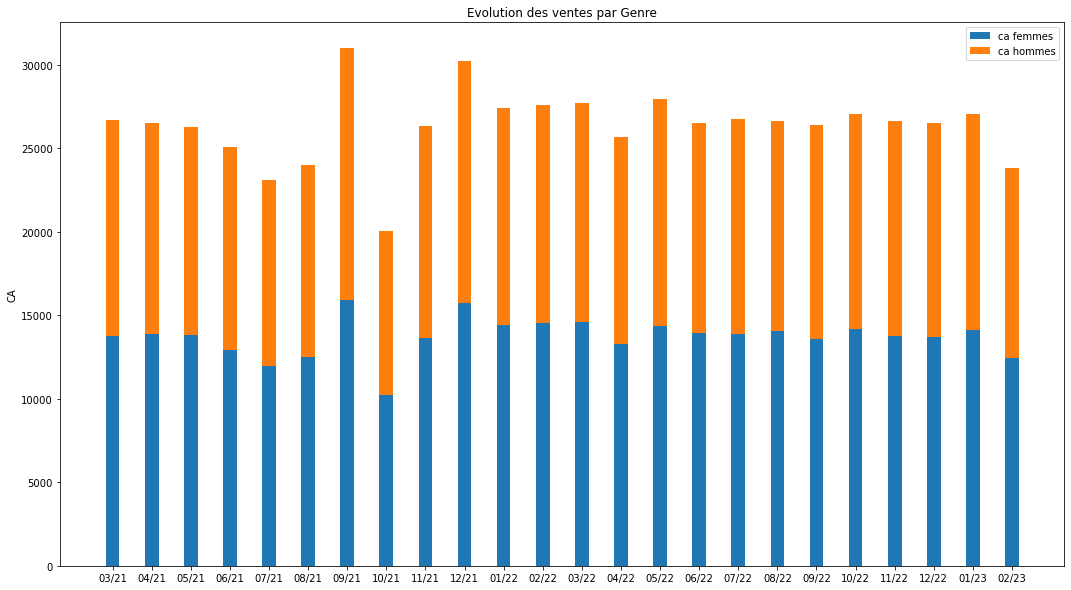

In [95]:
plt.figure(figsize=(18, 10))

cafemmes = btc.loc[btc['sex'] == 'f' ].groupby('date2')['vente'].sum()
cahommes = btc.loc[btc['sex'] == 'm' ].groupby('date2')['vente'].sum()

ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



p1 = plt.bar(ind, cafemmes, width)
p2 = plt.bar(ind, cahommes, width, bottom =cafemmes)


plt.ylabel('CA')
plt.title('Evolution des ventes par Genre')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0]), ('ca femmes', 'ca hommes'))

plt.show()

#### Evolution ventes par tranche d age

In [96]:
btc.head()

id_prod       date session_id client_id sex  birth  price categ _merge  \
0  0_1518 2022-05-20   s_211425     c_103   f   1986   4.18   0.0   both   
1   1_251 2022-02-02   s_158752    c_8534   m   1988  15.99   1.0   both   
3   2_209 2021-06-24    s_52962    c_6941   m   2000  69.99   2.0   both   
4  0_1509 2023-01-11   s_325227    c_4232   m   1980   4.99   0.0   both   
5  0_1418 2022-10-20   s_285425    c_1478   f   1972   8.57   0.0   both   

     date2 années mois jours  age  vente groupe_age  
0  2022-05   2022   05    20   37      1      26-45  
1  2022-02   2022   02    02   35      1      26-45  
3  2021-06   2021   06    24   23      1        -26  
4  2023-01   2023   01    11   43      1      26-45  
5  2022-10   2022   10    20   51      1      46-65

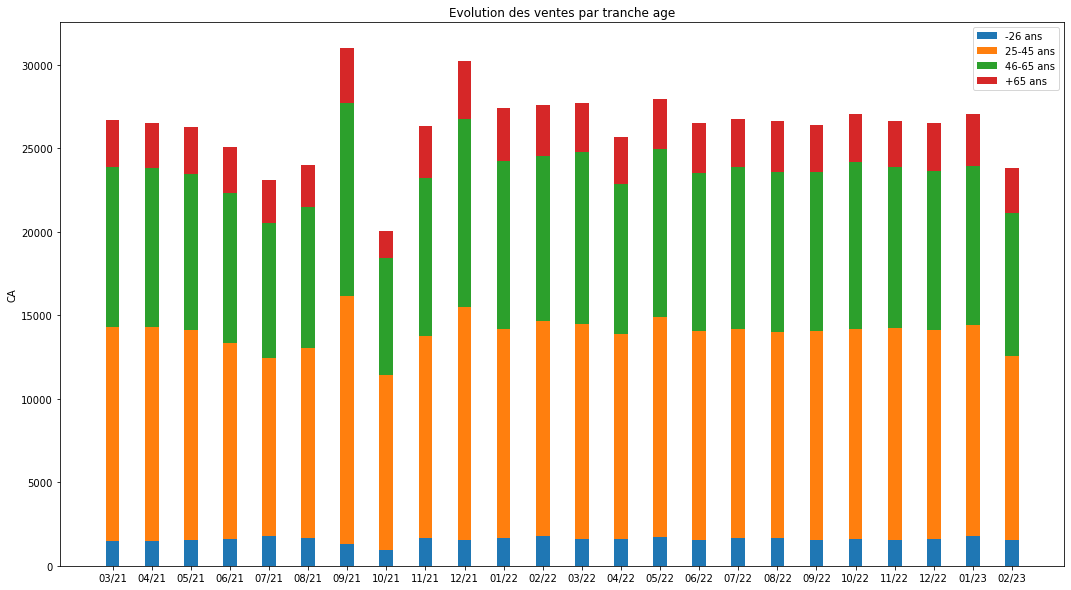

In [97]:
plt.figure(figsize=(18, 10))

moins26 = btc.loc[btc['groupe_age'] == '-26' ].groupby('date2')['vente'].sum()
moins45 = btc.loc[btc['groupe_age'] == '26-45' ].groupby('date2')['vente'].sum()
moins65 = btc.loc[btc['groupe_age'] == '46-65' ].groupby('date2')['vente'].sum()
plus65 = btc.loc[btc['groupe_age'] == '+65' ].groupby('date2')['vente'].sum()

ind = np.arange(24)   
width = 0.35       


p1 = plt.bar(ind, moins26, width)
p2 = plt.bar(ind, moins45, width, bottom =moins26)
p3 = plt.bar(ind, moins65, width, bottom= moins26+ moins45)
p4 = plt.bar(ind, plus65, width, bottom= moins26+ moins45 + moins65)

plt.ylabel('CA')
plt.title('Evolution des ventes par tranche age')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0],p3[0], p4[0]), ('-26 ans', '25-45 ans','46-65 ans', '+65 ans'))

plt.show()

#### jours de ventes par catégorie

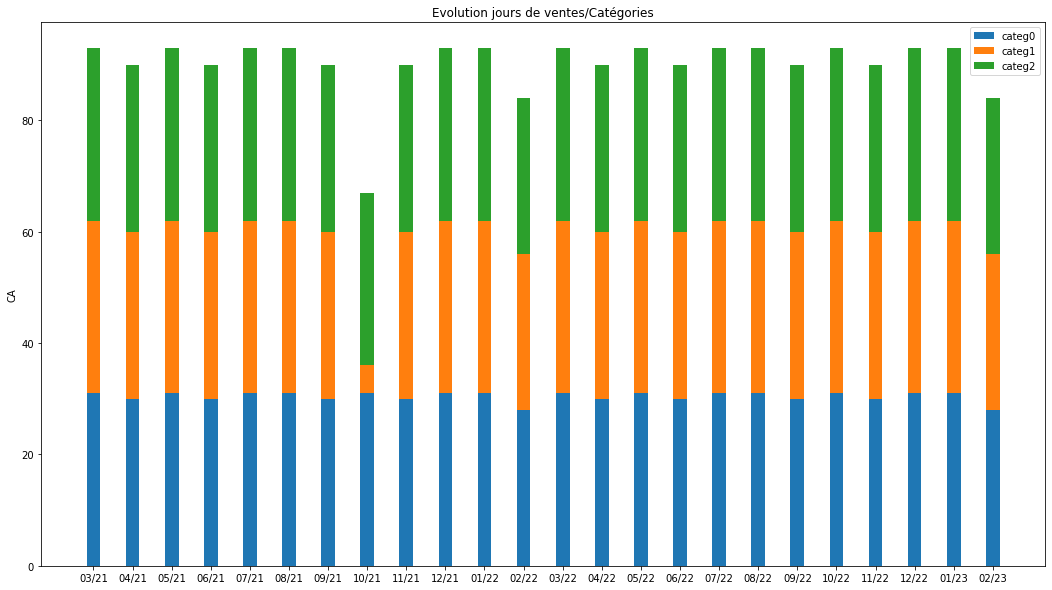

In [98]:
plt.figure(figsize=(18, 10))

categ0 = df.loc[df['categ'] == '0.0' ].groupby('date2')['jours'].nunique()
categ1 = df.loc[df['categ'] == '1.0' ].groupby('date2')['jours'].nunique()
categ2 = df.loc[df['categ'] == '2.0' ].groupby('date2')['jours'].nunique()
ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



p1 = plt.bar(ind, categ0, width)
p2 = plt.bar(ind, categ1, width, bottom =categ0)
#p3 = plt.bar(ind, catsMeans, width, bottom= tuple(map(sum, zip(menMeans, womenMeans))))
p3 = plt.bar(ind, categ2, width, bottom= categ0+ categ1)


plt.ylabel('CA')
plt.title('Evolution jours de ventes/Catégories')
plt.xticks(ind, ('03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22', '05/22', '06/22', '07/22', '08/22', '09/22', '10/22', '11/22', '12/22', '01/23', '02/23'))
#plt.yticks(np.arange(0, 210, 10))
plt.legend((p1[0], p2[0],p3[0]), ('categ0', 'categ1','categ2'))

plt.show()

#### Ventes en fonction des prix

In [99]:
VP = pd.pivot_table(df, index ='price', values= "vente", aggfunc= 'sum')
VP.head()

vente
price       
0.62      18
0.66      15
0.77       5
0.81      19
0.88       7

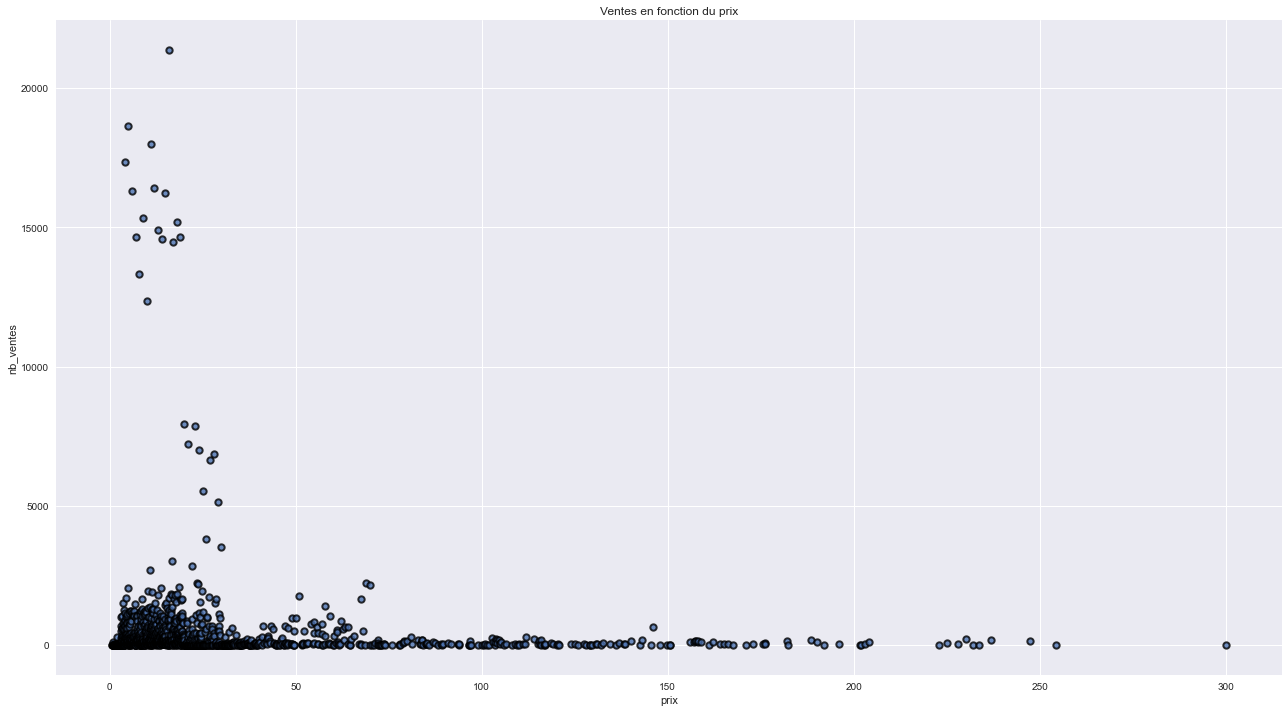

In [100]:
plt.figure(figsize=(18, 10))
plt.style.use('seaborn')
prix = VP.index
nb_ventes = VP['vente'] 
plt.scatter(prix, nb_ventes,  s=40, alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Ventes en fonction du prix')
plt.ylabel('nb_ventes')
plt.xlabel ('prix')
plt.tight_layout()
plt.show() 

### Moyenne Mobile 

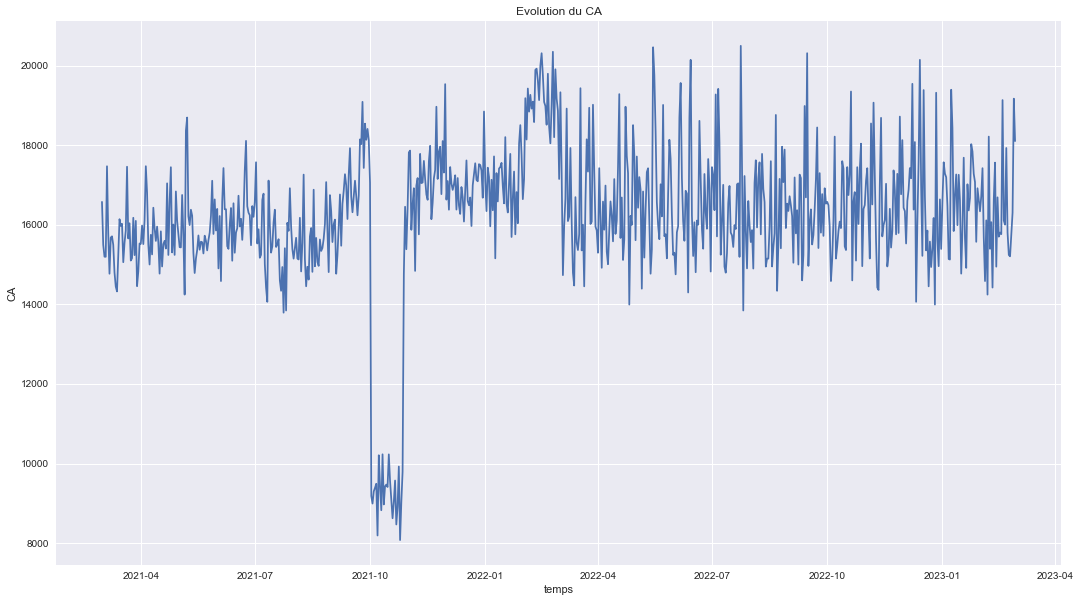

In [101]:
plt.figure(figsize=(18, 10))
temps = Table.index
CA = Table["price"]
  
plt.plot(temps, CA)
plt.title('Evolution du CA')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

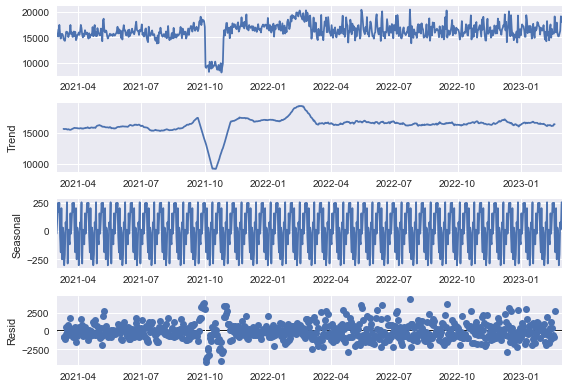

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_ca = seasonal_decompose(Table,  model='additive', period=21)
decomp_ca.plot()
plt.show()

#### Correction par moyenne mobile

In [103]:
tablo = Table.sort_values(by='date') 
tablo['Mmobile31']= tablo.price.rolling(31).mean()
tablo['Mmobile21']= tablo.price.rolling(21).mean()
tablo['Mmobile15']= tablo.price.rolling(15).mean()
tablo.tail()

price     Mmobile31     Mmobile21     Mmobile15
date                                                          
2023-02-24  15207.89  16292.841290  16075.726667  16197.702000
2023-02-25  15761.25  16225.714839  16131.676190  16286.903333
2023-02-26  16304.72  16194.224839  16140.881429  16264.800667
2023-02-27  19170.81  16261.881935  16375.385714  16371.998000
2023-02-28  18105.15  16343.560968  16370.058571  16582.432000

Moyenne Mobile sur 10, 15, 21 et 30 jours ci dessus

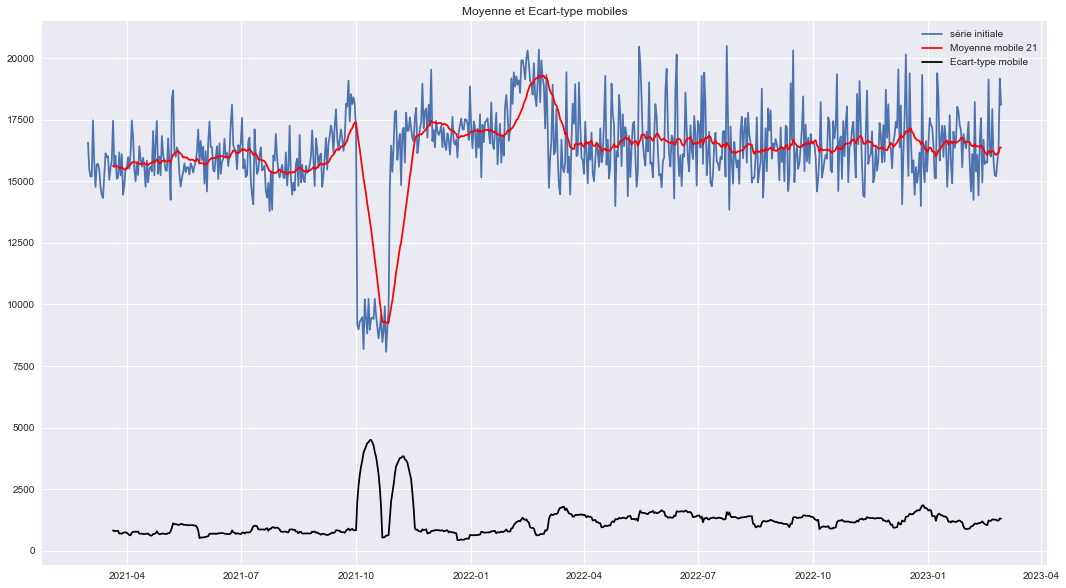

In [104]:
plt.figure(figsize=(18, 10))
temps = tablo.index
CA = tablo["price"]
MM21 = tablo['Mmobile21']
rolling_std = tablo['price'].rolling(window = 21).std()

plt.plot(temps, CA, label = 'série initiale')
plt.plot(MM21, color = 'red', label = 'Moyenne mobile 21')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

Courbe de Tendance

<AxesSubplot:xlabel='date'>

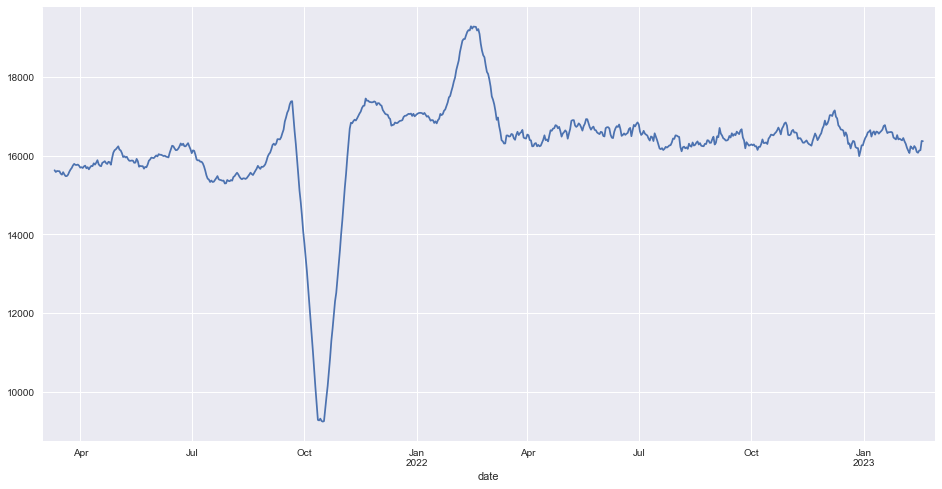

In [105]:
plt.figure(figsize=(16, 8))
decomp_ca.trend.plot()

Prévision de la tendance du CA méthode de Holt-Winters

C:\Users\HAL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\HAL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


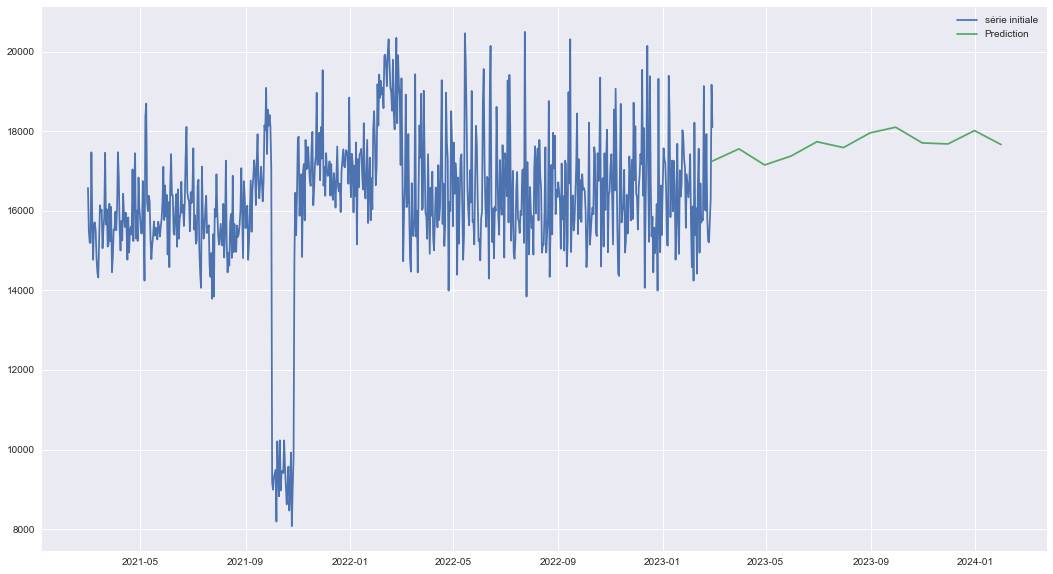

In [106]:

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
hw = ExponentialSmoothing(np.asarray(Table['price']), seasonal_periods=21, trend='mul', seasonal='mul').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(18,10))
plt.plot(Table, label='série initiale')
plt.plot(pd.date_range(Table.index[len(Table)-1], periods=12, freq='M'), hw_pred, label='Prediction')
plt.legend()
plt.show()

### Analyse Produits

#### Répartition des ventes par produits 

Utilisons encore une fois la courbe de Lorenz et l'indice de Gini

In [107]:
ventesprod = pd.pivot_table(df, index ='id_prod', values= "vente",   aggfunc= 'sum')
ventesprod.head()

vente
id_prod       
0_0       1242
0_1        487
0_10        22
0_100        3
0_1000     432

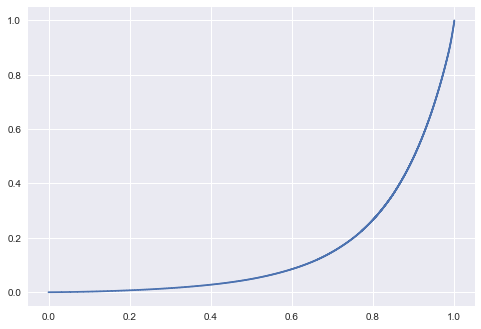

In [108]:
ventes = ventesprod[ventesprod['vente'] > 0]
vet = ventes['vente'].values
n = len(vet)
lorenz = np.cumsum(np.sort(vet)) / vet.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [109]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.6936578721298454

L'indice de Giny est elevé, il y a donc des inégalités de vente par produits

#### Top/flop VENTES

In [110]:
ventesprod.sort_values(by = 'vente',  ascending = False)

vente
id_prod       
1_369     2252
1_417     2189
1_414     2180
1_498     2128
1_425     2096
...        ...
0_1284       1
0_549        1
0_1498       1
0_541        1
0_886        1

[3266 rows x 1 columns]

Les 5 produits les plus vendus de notre échantillon sont : 1_369, 1_417, 1_414, 1_498 et 1_425

In [111]:
ventesprod.sort_values(by = 'vente').head(20)

vente
id_prod       
0_549        1
0_2201       1
2_23         1
0_1284       1
0_1683       1
0_833        1
2_98         1
0_1633       1
0_1601       1
2_81         1
0_807        1
0_541        1
0_1151       1
0_886        1
0_1539       1
0_1379       1
0_1728       1
0_1498       1
0_88         2
0_1803       2

Les 18 produits les moins vendus de notre échantillon ce dessus

#### Top/Flop CA

In [112]:
CAprod = pd.pivot_table(df, index ='id_prod', values= "price", aggfunc= 'sum')
CAprod.head()

price
id_prod         
0_0      4657.50
0_1      5352.13
0_10      394.90
0_100      61.80
0_1000   2954.88

In [113]:
CAprod.sort_values(by = 'price').head(10)

price
id_prod       
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_541     1.99
0_807     1.99
0_1601    1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56

Les 10 produits qui rapportent le moins sont ce dessus

In [114]:
CAprod.sort_values(by = 'price', ascending = False).head(10)

price
id_prod          
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    54356.25
1_369    54025.48
2_110    53846.25
2_39     53060.85
2_166    52449.12

Les 10 produits qui rapportent le plus sont ci dessus

In [115]:
btc.groupby(by= 'categ').describe()

birth                                                          \
          count         mean        std     min     25%     50%     75%   
categ                                                                     
0.0    387493.0  1978.205426  11.515761  1929.0  1974.0  1980.0  1986.0   
1.0    212348.0  1974.197087  15.793502  1929.0  1963.0  1975.0  1986.0   
2.0     32848.0  1996.034492   9.899864  1929.0  1994.0  1998.0  2002.0   

                  price             ...   age           vente                 \
          max     count       mean  ...   75%   max     count mean  std  min   
categ                               ...                                        
0.0    2004.0  387493.0  10.636187  ...  49.0  94.0  387493.0  1.0  0.0  1.0   
1.0    2004.0  212348.0  20.482571  ...  60.0  94.0  212348.0  1.0  0.0  1.0   
2.0    2004.0   32848.0  76.231870  ...  29.0  94.0   32848.0  1.0  0.0  1.0   

                           
       25%  50%  75%  max  
categ                      
0.0    1.0  1.0  1.0  1.0  
1.0    1.0  1.0  1.0  1.0  
2.0    1.0  1.0  1.0  1.0  

[3 rows x 32 columns]

In [116]:
products.groupby(by= 'categ').describe()

price                                                                
        count        mean        std    min      25%     50%      75%     max
categ                                                                        
0      2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   40.99
1       739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   80.99
2       239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530  300.00

Les produits de categorie 0 représentent enssemble la majorité des ventes, ils coutent entre 0.62 et 40.99 = entrée de gamme
Les produits de catégorie 1 comptent par les references les plus vendues = milieu de gamme  
Les produits de catégorie 2 sont les moins vendus mais coutent plus cher, ils comptent parmis les references qui rapportent le plus = haut de gamme 

## Mission II :  Analyse sur les Clients

### Genre client et Catégories livres achetés

In [117]:
#créer un dataframe groupé sur les clients, par categorie, sex et age
dfclient = btc.groupby(['client_id','categ','sex','age'] ).size().to_frame(name = 'count').reset_index()

In [118]:
pd.crosstab(dfclient['categ'], btc['sex'], margins=True, margins_name="Total"  )

sex       f     m  Total
categ                   
0.0    3872  3464   7336
1.0    4117  3775   7892
2.0    1750  1606   3356
Total  9739  8845  18584

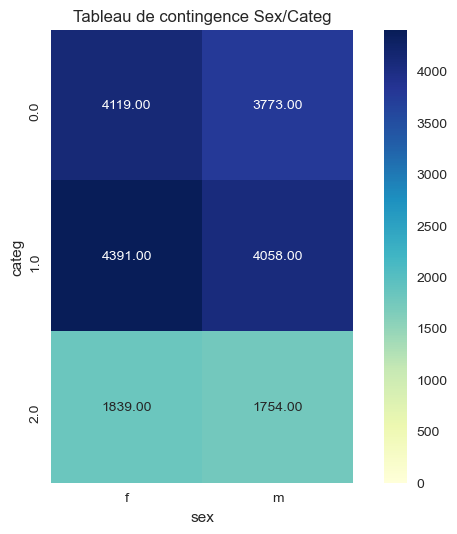

In [119]:
Tableau_de_contingence = pd.crosstab(dfclient['categ'], dfclient['sex']  )

fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(Tableau_de_contingence, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=4400.0)

plt.title('Tableau de contingence Sex/Categ',fontsize=12)

plt.savefig("plot_contingency_table_seaborn_matplotlib_01.png", bbox_inches='tight', dpi=100)

plt.show()

#### Test Statistique du Chi2

In [120]:
X = "sex"
Y = "categ"
cont = dfclient[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")


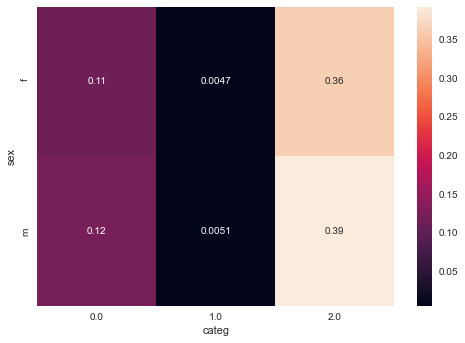

In [121]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dfclient)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1])
plt.show()

In [122]:
import scipy.stats as st
from scipy.stats import ks_2samp 

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont.iloc[:-1,:-1])

In [123]:
print('chi2 = ',st_chi2, 'et Pvalue =', st_p)

chi2 =  1.024728095659948 et Pvalue = 0.5990776552222239


Hypothèse nulle H0 : catégorie de livre acheté ne depend pas du genre,  
ici Pv >0.05, H0 ne peut être rejetée,   
on ne peut pas conclure que les variables genre et et catégorie soient dependantes.  

### Age client et montant des achats

In [124]:
#créer un dataframe groupé sur les clients, par age et CA
AgeCA = pd.pivot_table(btc, index =['client_id','age'], values= "price", aggfunc= 'sum').reset_index()
AgeCA.head()

client_id  age    price
0       c_1   68   558.18
1      c_10   67  1353.60
2     c_100   31   254.85
3    c_1000   57  2261.89
4    c_1001   41  1812.86

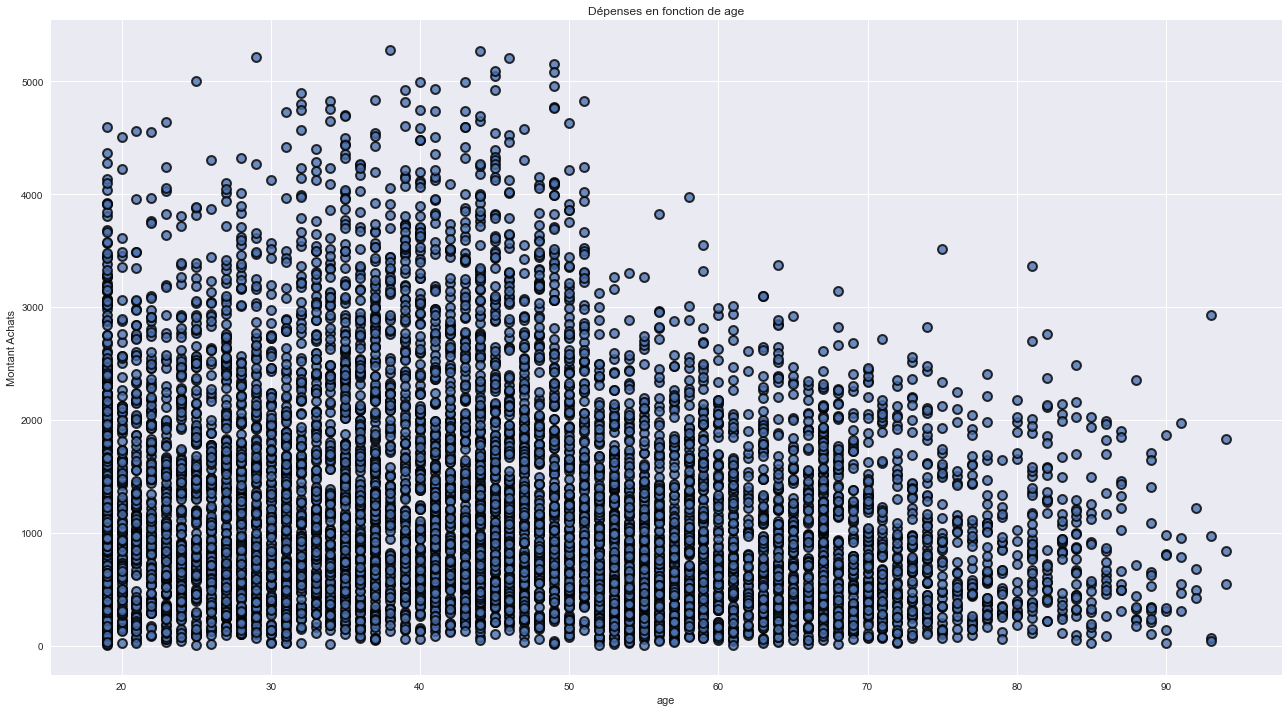

In [125]:
plt.figure(figsize=(18, 10))
plt.style.use('seaborn')
age = AgeCA['age']
CA = AgeCA['price'] 
plt.scatter(age, CA,  s=80, alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Dépenses en fonction de age')
plt.ylabel('Montant Achats')
plt.xlabel ('age')
plt.tight_layout()
plt.show() 

#### Test Statistique de Pearson 

In [126]:
import scipy.stats as st

print('Le coefficient de corrélation de Pearson est', st.pearsonr(AgeCA["age"],AgeCA["price"]))
print('La Covariance est', np.cov(AgeCA["age"],AgeCA["price"],ddof=0)[1,0])

Le coefficient de corrélation de Pearson est (-0.18832670518175298, 1.8586396061094818e-69)
La Covariance est -3039.215279289487


Le coefficient de correlation de Pearson est de -0.188, on a donc une légère correlation négative entre l'age et le montant des achats. 
La Pvalue est inférieure à 5%, la correlation linéaire est significative. 


#### Test Statistique de Spearman

Utilisons le test de Spearman pour completer la correlation linéaire de Pearson 

In [127]:
AgeCA['age'].corr(AgeCA['price'], method="spearman")

-0.18510143116868508

In [128]:
from scipy.stats import spearmanr
coef, p = spearmanr(AgeCA['age'], AgeCA['price'])
print('le coefficient de correlation de Spearman est : %.3f' % coef)

le coefficient de correlation de Spearman est : -0.185


Nous avons à peu de choses pres le même resultat

### Age client et fréquence d'achat 

Calculons la fréquence d'achat : il s'agit du nombre moyen d'achats réalisé pendant une période donnée par un ensemble de clients. 

In [129]:
#selectionnons nos données
dfAF = btc.groupby(['client_id','session_id','age', 'années','mois'] ).size().to_frame(name = 'count').reset_index()
dfAF.head()

client_id session_id  age années mois  count
0       c_1   s_105105   68   2021   10      1
1       c_1   s_114737   68   2021   11      5
2       c_1   s_120172   68   2021   11      2
3       c_1   s_134971   68   2021   12      1
4       c_1   s_136532   68   2021   12      1

In [130]:
#regroupons le dataframe pour avoir le nb de sessions uniques par mois, par clients 
frequenceAge = dfAF.groupby(['client_id','age','années','mois'])[['session_id']].nunique().reset_index()
frequenceAge.head(13)

client_id  age années mois  session_id
0        c_1   68   2021   06           1
1        c_1   68   2021   07           4
2        c_1   68   2021   08           1
3        c_1   68   2021   09           2
4        c_1   68   2021   10           1
5        c_1   68   2021   11           2
6        c_1   68   2021   12           3
7        c_1   68   2022   02           1
8        c_1   68   2022   03           2
9        c_1   68   2022   04           2
10       c_1   68   2022   05           1
11       c_1   68   2022   06           3
12       c_1   68   2022   07           3

In [131]:
#data frame par clients avec âge et nb moyen de sessions d'achats par mois
frequenceAge2 = frequenceAge.groupby(['client_id','age'])[['session_id']].mean().reset_index()
frequenceAge2.head()

client_id  age  session_id
0       c_1   68    1.941176
1      c_10   67    2.125000
2     c_100   31    1.000000
3    c_1000   57    4.227273
4    c_1001   41    2.350000

Nous avons notre frequence d'achat mensuelle par clients associée à l'age.

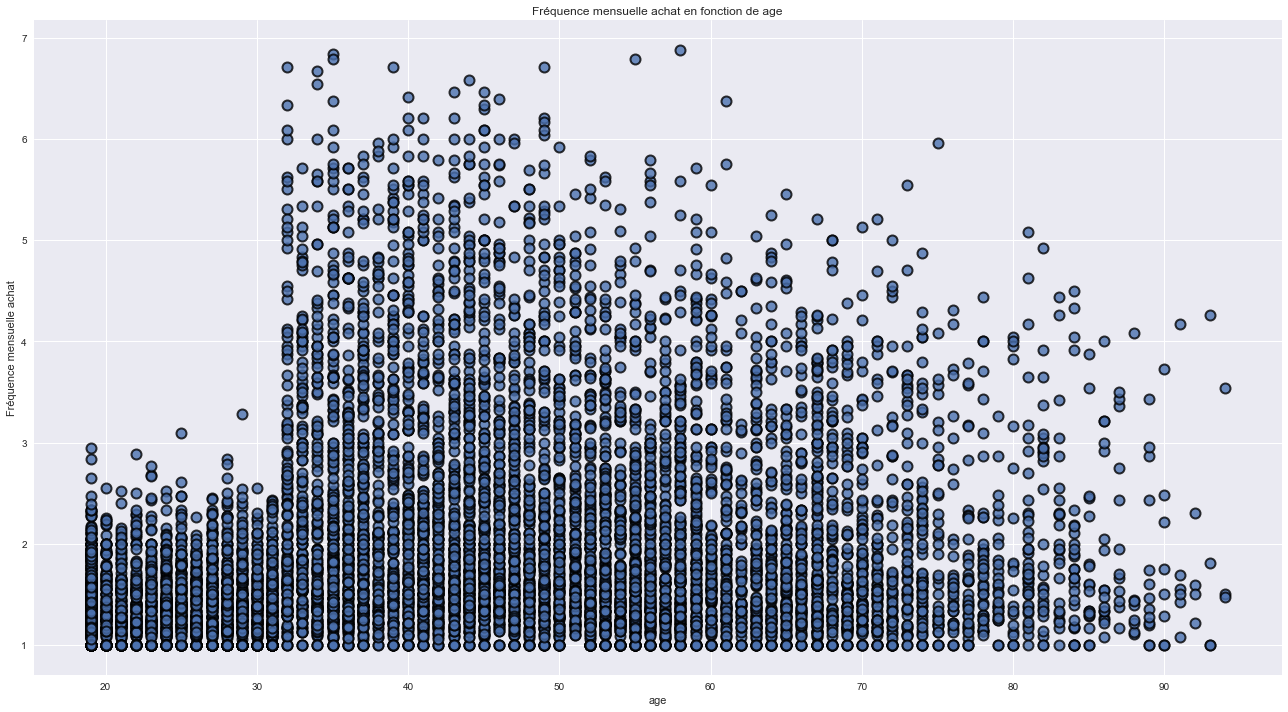

In [132]:

plt.figure(figsize=(18, 10))
plt.style.use('seaborn')
age = frequenceAge2['age']
frequence_achat = frequenceAge2['session_id'] 
plt.scatter(age, frequence_achat,  s=100, alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Fréquence mensuelle achat en fonction de age')
plt.ylabel('Fréquence mensuelle achat')
plt.xlabel ('age')
plt.tight_layout()
plt.show() 

#### Test de Spearman

In [133]:
from scipy.stats import spearmanr
coef, p = spearmanr(frequenceAge2['age'], frequenceAge2['session_id'])
print ('le coef de spearman est de', coef, 'la p value est', p)

le coef de spearman est de 0.20608355165108688 la p value est 4.272028369734415e-83


Le coefficient de spearman est 0.208 on a donc une relation modérée entre age et la frequence d'achat 
et la p value est <5% , le risque de se tromper en rejetant H0 = aucune correlation est faible. 

### Age d'un client et taille panier moyen

Calculons le panier moyen par clients : il s'agit du nombre d'articles par sessions, soit le nombre d'achats par session par clients


In [134]:
dfAP = btc.groupby(['client_id','session_id','price','age','vente']).size().reset_index()
dfAP.head()

client_id session_id  price  age  vente  0
0       c_1   s_105105   7.99   68      1  1
1       c_1   s_114737   3.99   68      1  1
2       c_1   s_114737   4.00   68      1  1
3       c_1   s_114737  14.85   68      1  1
4       c_1   s_114737  14.91   68      1  1

In [135]:
DFPanier = dfAP.groupby(['client_id','age'])['session_id'].nunique().reset_index()
DFPanier2 = dfAP.groupby(['client_id','age'])[['vente','price']].sum().reset_index()
DFPanier[['achat','price']] = DFPanier2[['vente','price']]
DFPanier.head()

client_id  age  session_id  achat    price
0       c_1   68          33     39   558.18
1      c_10   67          34     58  1353.60
2     c_100   31           5      8   254.85
3    c_1000   57          93    125  2261.89
4    c_1001   41          47    102  1812.86

Une fois notre dataframe préparé, on peut créer une colonne 'Taille_panier_moyen' qui calcule le nombre d'achats par clients par le nombre de sessions par clients

In [136]:
DFPanier['Taille_panier_moyen']= DFPanier['achat']/DFPanier['session_id']
DFPanier.head()

client_id  age  session_id  achat    price  Taille_panier_moyen
0       c_1   68          33     39   558.18             1.181818
1      c_10   67          34     58  1353.60             1.705882
2     c_100   31           5      8   254.85             1.600000
3    c_1000   57          93    125  2261.89             1.344086
4    c_1001   41          47    102  1812.86             2.170213

Nous pouvons aussi calculer la valeurs de ce panier moyen dans la colonne 'Valeur_panier_moyen'

In [137]:
DFPanier['Valeur_panier_moyen']= DFPanier['price']/DFPanier['session_id']
DFPanier.head()

client_id  age  session_id  achat    price  Taille_panier_moyen  \
0       c_1   68          33     39   558.18             1.181818   
1      c_10   67          34     58  1353.60             1.705882   
2     c_100   31           5      8   254.85             1.600000   
3    c_1000   57          93    125  2261.89             1.344086   
4    c_1001   41          47    102  1812.86             2.170213   

   Valeur_panier_moyen  
0            16.914545  
1            39.811765  
2            50.970000  
3            24.321398  
4            38.571489

Nous pouvons comparer l'age d'un client et le panier moyen desormais

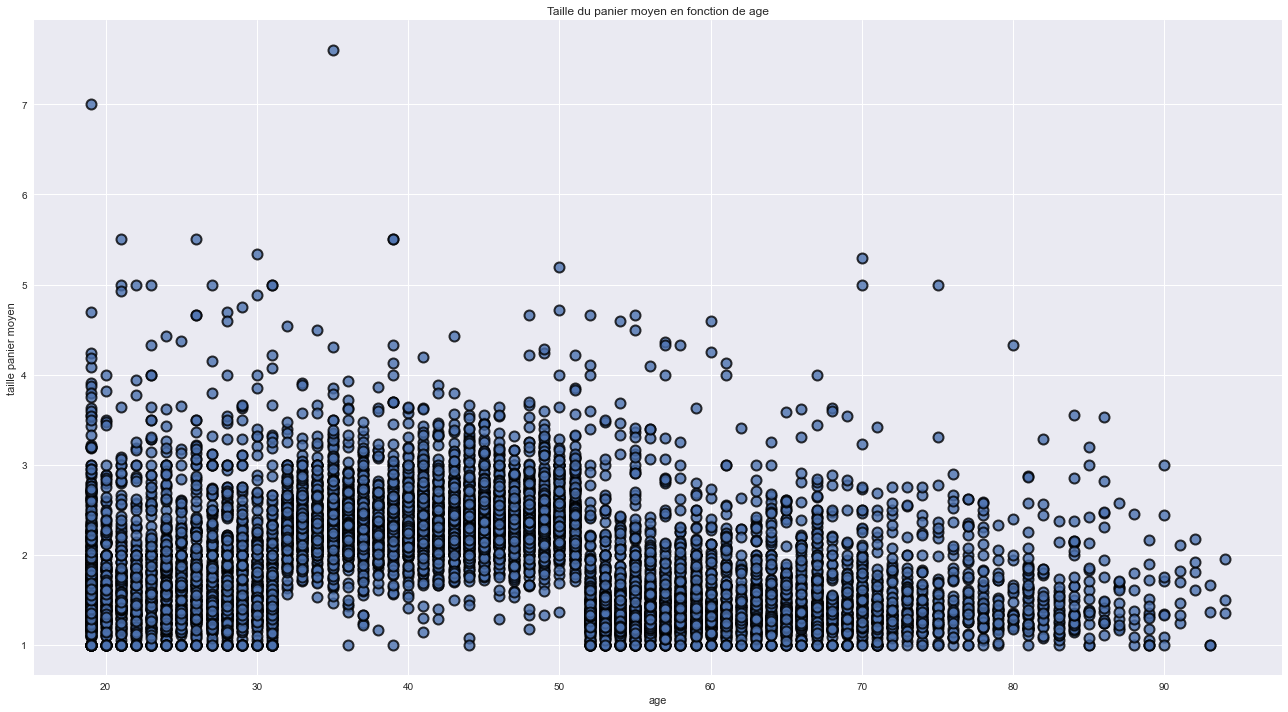

In [138]:
plt.figure(figsize=(18, 10))
plt.style.use('seaborn')
age = DFPanier['age']
taillepaniermoyen = DFPanier['Taille_panier_moyen'] 
plt.scatter(age, taillepaniermoyen,  s=100, alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Taille du panier moyen en fonction de age')
plt.ylabel('taille panier moyen')
plt.xlabel ('age')
plt.tight_layout()
plt.show() 

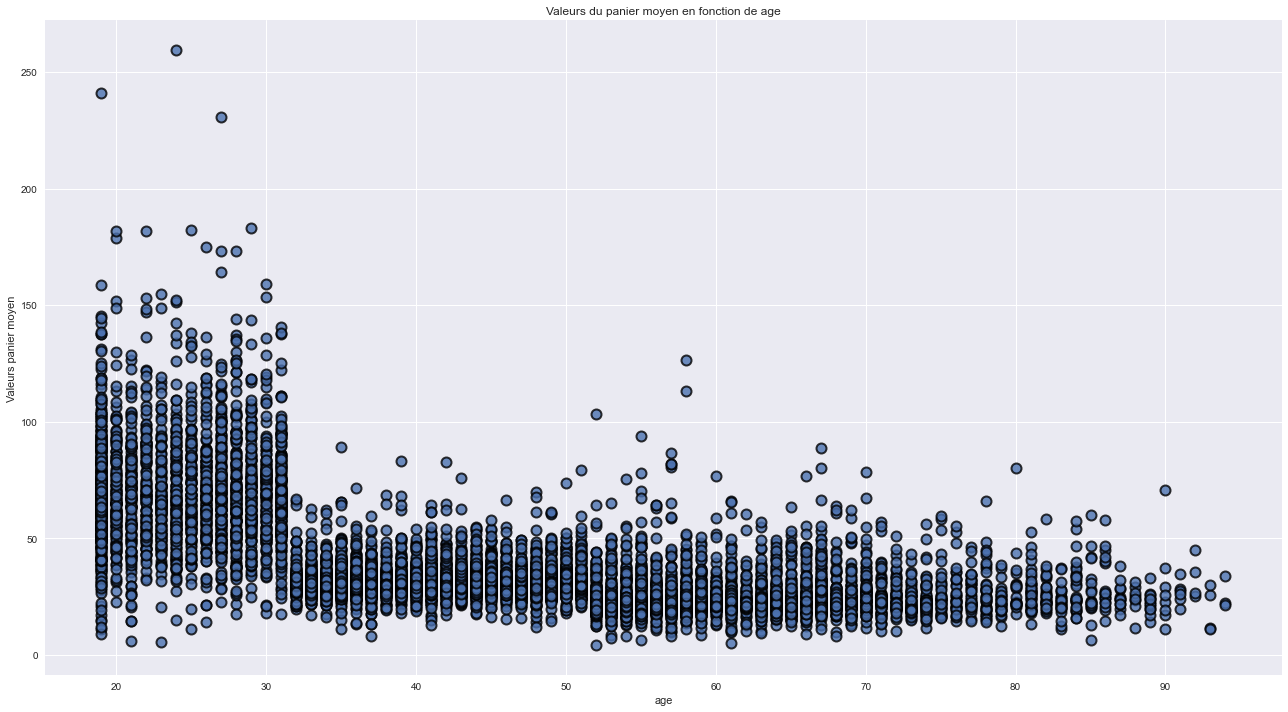

In [139]:
plt.figure(figsize=(18, 10))
plt.style.use('seaborn')
age = DFPanier['age']
valeurspaniermoyen = DFPanier['Valeur_panier_moyen'] 
plt.scatter(age, valeurspaniermoyen,  s=100, alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Valeurs du panier moyen en fonction de age')
plt.ylabel('Valeurs panier moyen')
plt.xlabel ('age')
plt.tight_layout()
plt.show() 

#### Test Statistique de Spearman

In [140]:
from scipy.stats import spearmanr
coef, p = spearmanr(DFPanier['age'], DFPanier['Taille_panier_moyen'])
print ('le coef de spearman est de', coef, 'la p value est', p)

le coef de spearman est de -0.20781506002083938 la p value est 1.6972877438878653e-84


On peut dire que nous avons bien une correlation négative modérée entre l'age et la taille du panier

#### Tau de Kendall

In [141]:
import scipy.stats as stats
tau, p_value = stats.kendalltau(DFPanier['age'],DFPanier['Taille_panier_moyen'])

In [142]:
tau, p_value

(-0.13159325956311382, 3.456085693918607e-73)

même conclusion 

### Age d'un client et catégorie de livres achetés

In [143]:
Agecateg = btc.groupby(['client_id','categ','age'] ).size().to_frame(name = 'count').reset_index()
Agecateg.head()


client_id categ  age  count
0       c_1   0.0   68     30
1       c_1   1.0   68      8
2       c_1   2.0   68      1
3      c_10   0.0   67     20
4      c_10   1.0   67     34

In [144]:
pd.crosstab(Agecateg['categ'], Agecateg['age'], margins=True, margins_name="Total"  )

age      19   20   21   22   23   24   25   26   27   28  ...  86  87  88  89  \
categ                                                     ...                   
0.0     313   96  100   91  100  108  100  108  122  129  ...  17  12   8  13   
1.0     427  137  138  117  129  150  135  144  175  171  ...  17  12   8  13   
2.0     415  141  136  122  129  154  133  144  172  167  ...   6   4   1   3   
Total  1155  374  374  330  358  412  368  396  469  467  ...  40  28  17  29   

age    90  91  92  93  94  Total  
categ                             
0.0     8   6   4   3   3   7892  
1.0     8   6   4   4   3   8449  
2.0     1   1   1   1   1   3593  
Total  17  13   9   8   7  19934  

[4 rows x 77 columns]

In [145]:
bins= [0,25,45,65,100]
labels = ['-26','26-45','46-65','+65']
Agecateg['groupe_age'] = pd.cut(Agecateg['age'], bins=bins, labels=labels, right=False)

In [146]:
GrAge_categ = pd.crosstab(Agecateg['categ'], Agecateg['groupe_age'], dropna=False)
GrAge_categ.head()

groupe_age   -26  26-45  46-65   +65
categ                               
0.0          808   3010   2816  1258
1.0         1098   3284   2801  1266
2.0         1097   1575    649   272

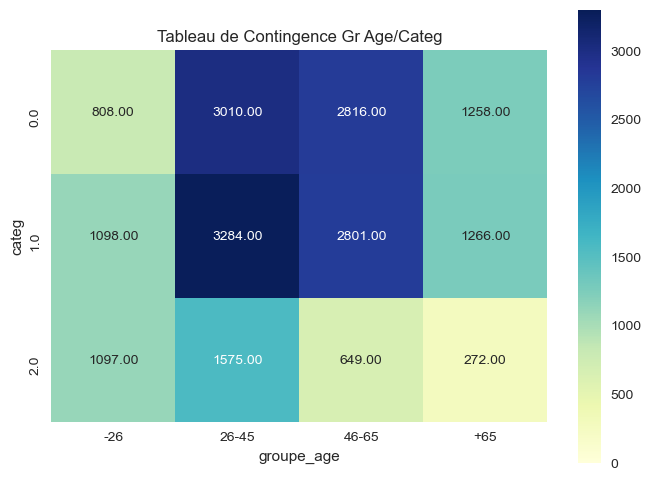

In [147]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(GrAge_categ, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=3300.0)

plt.title('Tableau de Contingence Gr Age/Categ',fontsize=12)

plt.savefig("plot_contingency_table_seaborn_matplotlib_01.png", bbox_inches='tight', dpi=500)

plt.show()

#### Test ANOVA

In [148]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = Agecateg.loc[Agecateg["age"] > 0, :].copy()


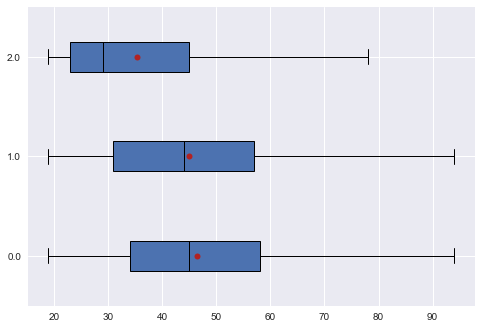

In [149]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [150]:
X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.05454473468125901

In [151]:
print ('le rapport de corrélation eta2=',eta_squared(sous_echantillon[X],sous_echantillon[Y]),'est proche de zero, la correlation est faible')

le rapport de corrélation eta2= 0.05454473468125901 est proche de zero, la correlation est faible


Hypothèse nulle : Les moyennes des groupes sont égales (pas de variation des moyennes des groupes, pas de relation entre les variables)

Hypothèse alternative : Au moins, une moyenne de groupe est différente des autres groupes
H 1 : Tous les μ ne sont pas égaux

In [152]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('age ~ categ', data=Agecateg).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df           F         PR(>F)
categ     3.169692e+05      2.0  574.924667  1.779238e-243
Residual  5.494209e+06  19931.0         NaN            NaN

P trés proche de zero l'hypothèse nulle n'est pas validée

Test de Oneway pour completer

In [153]:
categ0 = Agecateg.loc[Agecateg['categ']=='0.0']['age']
categ1 = Agecateg.loc[Agecateg['categ']=='1.0']['age'] 
categ2 = Agecateg.loc[Agecateg['categ']=='2.0']['age']

In [154]:
f, p = st.f_oneway(categ0,categ1,categ2)

In [155]:
f,p

(574.9246668829222, 1.7792383221040405e-243)

p< 0.5 nous rejetons l'hypothèse nulle 

ces Tests ne sont valable que si nos échantillons suivent une loi normale

Text(0.5, 1.0, 'distribution age pour categ 0')

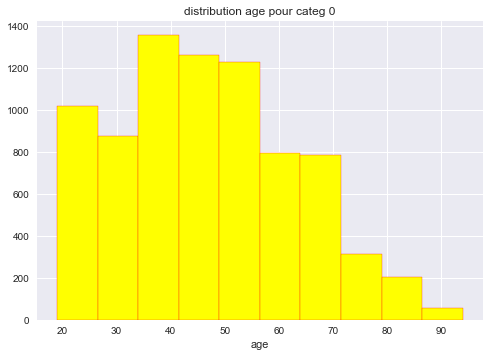

In [156]:
x = categ0
plt.hist(x,  color = 'yellow',
            edgecolor = 'red')
plt.xlabel('age')
plt.title('distribution age pour categ 0')

In [157]:
categ0.mean()

46.36657374556513

Text(0.5, 1.0, 'distribution age pour categ 1')

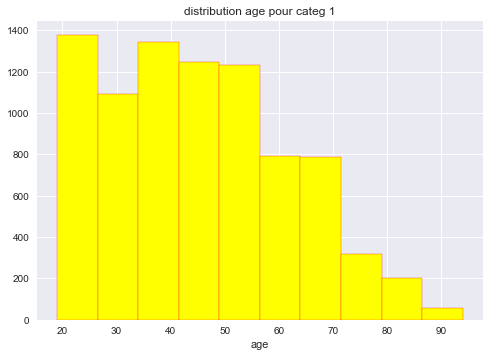

In [158]:
x = categ1
plt.hist(x,  color = 'yellow',
            edgecolor = 'red')
plt.xlabel('age')
plt.title('distribution age pour categ 1')

In [159]:
categ1.mean()

44.8937152325719

Text(0.5, 1.0, 'distribution age pour categ 2')

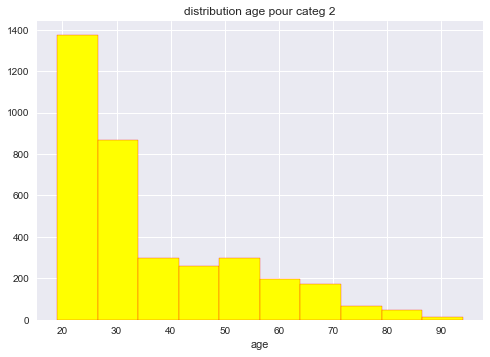

In [160]:
x = categ2
plt.hist(x,  color = 'yellow',
            edgecolor = 'red')
plt.xlabel('age')
plt.title('distribution age pour categ 2')

In [161]:
categ2.mean()

35.37712218202059

graphiquement nous n'avons pas des courbe en cloche autour de la moyenne, verifions avec des tests de normalité

In [162]:
from scipy.stats import shapiro
import scipy.stats as stat
shapiro(categ0)

C:\Users\HAL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9796555042266846, pvalue=4.193440914708166e-32)

"C:\Users\HAL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
"

pvalue inferieure à 0.05 l'hypothèse nulle que la population est normalement distribuée est rejetée

Essayons avec un test basé sur ceui d'Agostino

In [163]:
import scipy 
scipy.stats.normaltest(categ0)


NormaltestResult(statistic=324.5737059666553, pvalue=3.3091409343373187e-71)

Nous parvenons à la même conclusion, notre échantillon ne suit pas une loi normale.
Utilisons un test non parametrique pour remplacer l'ANOVA, ici le test Kruskal-Wallis 

Hypothèse H0: les différents échantillons à comparer sont issus de la même distribution, pas de relation entre les variables

In [164]:
 scipy.stats.kruskal(categ0, categ1, categ2)


KruskalResult(statistic=1251.5352040537264, pvalue=1.7083760954350866e-272)

pvalue <0.05 on peut rejeter H0 et considerer d'après ce test qu'il y a une relation entre les variables age et catégories de livres achetés